# DA Analytics: Exploring Data and Building Machine Learning Models for Customer Churn in Telco Company
---

## DeadLine 2 Juni 2025

## Contact
- Name =  Shafy Hafidz (JCDS0508)
- Division =  Data Analyst
- Email = Sh4XXXXXXXX@gmail.com
- Phone = 081XXXXXXXX

---


# Library


In [1]:
# Library Python
import numpy as np 
import pandas as pd 

# Tabel Visualization
from tabulate import tabulate

# Graph Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LinearSegmentedColormap

# splitting data populasi 
from sklearn.model_selection import train_test_split

# PreProcessing
# column transformer 
from sklearn.compose import ColumnTransformer
#       Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
#       Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
#       Binning
from sklearn.preprocessing import KBinsDiscretizer
#       Column transformer 
from sklearn.compose import ColumnTransformer
#       Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Cross Validation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedGroupKFold,StratifiedKFold, KFold
#   Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#       Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier
#       Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from catboost import CatBoostClassifier

# metric
from sklearn.metrics import make_scorer,fbeta_score

# HyperParameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#   Sampling
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

# Confusion Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Save Result Model
import joblib
import tensorflow as tf
import torch

# Model Prediction Explanation 
import shap 

# Import Library Pickle for Model
import pickle

# To set display columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)  

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")


---

# 1. Business Problem Understanding

## 1.1 Product Information

In [2]:
data = [
    ["Phone Services", "services transmite voice, picture, video, etc","Single line or multiple lines"],
    ["Internet Services", "services allow to transmite more data in big scale ", "DSL, Fiber Optic, or No Internet"],
    ["Online Services", "similar to Internet Services but more spesific", "Online Security, Online Backup, Device Protection, Tech Support"],
    ["Streaming Services", "services in facilities and comfort on streaming platform", "Streaming TV and Streaming Movies"],

]

# Header tabel
headers = ["Product", "Description" ,"Services"]

# Buat tabel
print(tabulate(data, headers, tablefmt="github"))

| Product            | Description                                              | Services                                                        |
|--------------------|----------------------------------------------------------|-----------------------------------------------------------------|
| Phone Services     | services transmite voice, picture, video, etc            | Single line or multiple lines                                   |
| Internet Services  | services allow to transmite more data in big scale       | DSL, Fiber Optic, or No Internet                                |
| Online Services    | similar to Internet Services but more spesific           | Online Security, Online Backup, Device Protection, Tech Support |
| Streaming Services | services in facilities and comfort on streaming platform | Streaming TV and Streaming Movies                               |


Product Information:

- The product in focus is the range of telecommunications services offered by the telco company. These services include:
    1. Phone Service: Single line or multiple lines.
    2. Internet Service: DSL, Fiber Optic, or No Internet.
    3. Online Services: Online Security, Online Backup, Device Protection, Tech Support.
    4. Streaming Services: Streaming TV and Streaming Movies.
    5. Contract Types: Month-to-month, One year, Two years.
    6. Billing Options: Paperless Billing, Traditional Billing.
    7. Payment Methods: Bank Transfer, Credit Card, Electronic Check, Mailed Check.


## 1.2 Business Information

### 1.2.1 Context

The telecommunications industry is characterized by intense competition, driven by the presence of numerous service providers offering similar products and services. With low switching costs, customers can easily move between service providers, intensifying the competition further.

Key & Factor that could impact the churn rate customer are

1. High Customer Acquisition Costs:
    - Acquiring new customers in the telecom industry is considerably more expensive than retaining existing ones. Industry estimates indicate that **customer acquisition costs are 5-10 times higher** than retention costs. Consequently, companies are investing in targeted marketing, promotional offers, and customer relationship management to reduce churn.

2. Demand for Bundled Services:
    - As customers increasingly **demand comprehensive packages** (e.g., voice, data, TV, internet), telecom companies are compelled to offer bundled services. Bundling not only provides convenience for customers but **could also increases average revenue** per user (ARPU) and reduces churn rates.

3. Customer Churn and Retention:
    - According to a McKinsey report, the telecom industry experiences **average churn rates ranging from 10% to 25%** annually, making customer retention a **critical business priority**. High churn rates can significantly impact profitability, especially in saturated markets where new customer acquisition is costly and challenging.
        - Source Mckinsey Report [Click Here](https://www.mckinsey.com/industries/technology-media-and-telecommunications/our-insights/reducing-churn-in-telecom-through-advanced-analytics).

4. Strategic Implications:
    - Telecom companies need to adopt **data-driven customer retention** strategies, such as **predictive analytics**, to identify at-risk customers and implement targeted retention initiatives.


In summary, the telecommunications industry operates in a highly competitive landscape with significant challenges such as, high acquisition costs, and rising churn rates. To sustain growth and profitability, companies must focus on customer retention, service differentiation, and cost optimization.

### 1.2.2 Business Flow

Overall business that run in telecomunication sector have simmilarities in business flow such as :

1. **Customer Acquisition**:
    - Telecom companies utilize various marketing channels—including digital campaigns, bundle promotions, and partner collaborations—to attract new customers. This process is supported by Customer Relationship Management (CRM) systems, which are integral to Business Support Systems (BSS).
        - Source CA [Click Here](https://www.tutorialspoint.com/telecom-billing/customer-acquisition.htm).

2. **Customer Onboarding**:
    - After acquisition, customers select service plans and additional features. Effective onboarding includes clear communication, user guides, and initial support to ensure customers understand and can effectively utilize the services.
        - Source CO [Click Here](https://www.process.st/customer-onboarding-process/).

3. **Service Delivery**:
    - Once the onboarding is complete, selected services are activated and delivered. This phase involves provisioning systems to ensure that services such as voice, data, and TV are provided according to the customer’s plan.
        - Source SD [Click Here](https://en.wikipedia.org/wiki/Telecommunications_billing).

4. **Billing and Payments**:
    - Billing is conducted based on service usage and selected plan features. The billing system manages usage data collection, cost calculation, bill generation, payment processing, and invoice management.
        - Source BP [Click Here](https://en.wikipedia.org/wiki/Telecommunications_billing).

5. **Retention and Churn Management**:
    - Telecom providers focus on retention through loyalty programs, special offers, and service enhancements. High churn rates can significantly impact profitability, making retention strategies a business priority.
        - Source RC [Click Here](https://www.mckinsey.com/industries/technology-media-and-telecommunications/our-insights/reducing-churn-in-telecom-through-advanced-analytics).

### 1.2.3 Business Problem

1. The Critical Impact of Churn in Telecommunications !

    - **Customer churn** is one of the **most pressing challenges** in the telecom industry, directly **threatening revenue** stability, operational efficiency, and long-term growth. With monthly churn rates typically ranging between 1.5% and 5% in competitive markets, even marginal improvements in retention can translate into millions in recovered revenue.

        - Source Churn Rate Telco 2008 - 2023 [Click Here](https://www.statista.com/statistics/219801/total-churn-rate-of-verizon-since-2008/).

2. Why Churn Prediction Matters ?

    - 2.1 **Revenue Loss**:
        - A single lost customer represents not only their monthly subscription fee but also lifetime value (e.g., cross-sell opportunities, network effects). Bain & Company states that increasing customer retention by just 5% can boost profits by 25% to 95% depending on business scale.
            - Source Churn Customer Impact [Click Here](https://www.bain.com/insights/retaining-customers-is-the-real-challenge).

    - 2.2 **Cost of Acquisition**:
        - Replacing a churned customer costs 5–25x more than retaining an existing one. Additionally, the probability of selling to an existing customer ranges from 60% to 70%, compared to only 5% to 20% for a new prospect.
            - Source Cost Acquisition [Click Here](https://loyaltylion.com/blog/customer-retention-cost).
    
    - 2.3 **Company/Brand Reputation**:
        - High churn rates can be perceived as a signal of poor service quality, further deterring potential customers. Companies with high brand loyalty and customer retention grow revenues 2.5 times faster than their peers and deliver shareholder returns 2 to 5 times higher.
            - Source Churn Affect Reputation [Click Here](https://www.investopedia.com/terms/b/brand-loyalty.asp).




In Team Prediction, two primary types of errors can lead to significant financial implications:

- Target (Churn):

    1. Yes : Customer Discontinue Services [**Churn**]
    2. No : Customer Continue Services [**Not Churn**]

1. **False Positive (FP)**: Unnecessary Retention Costs
    - Scenario: The team incorrectly identifies a loyal customer as "at risk," **prompting unnecessary retention efforts**.
        - Predict [**Churn**] but [Not Churn]

    - Financial Impact:
        1. Retention Incentives: Costs associated with discounts, free upgrades, or other retention strategies.
        2. Operational Costs: Expenses related to call center outreach or personalized communication efforts.

    - Cost Calculation
        1. Average cost of retention incentives: $50–$150 (2020 Q2 ISP Company Indonesia) per customer.
        2. Call center costs for retention outreach: $10–$30 per interaction.
    - Example Calculation:
        - Assuming 10% of 7043 customers are misclassified as FP (704 customers):
            1. Minimum loss: 704 × $50 = $35,200
            2. Maximum loss: 704 × $150 = $105,600
        - Source Cost Retention [Click Here](https://www.academia.edu/77123614/Customer_Churn_Analysis_Analyzing_Customer_Churn_Determinants_on_an_ISP_Company_in_Indonesia).

2. **False Negative (FN)**: Lost Revenue from Missed Churn
    - Scenario: The model fails to identify a customer who subsequently churns, resulting in lost revenue.
        - Predict [**Not Churn**] but [Churn]

    - Financial Impact:
        1. Direct Revenue Loss: Calculated as the product of Average Revenue Per User (ARPU) and the customer's expected lifetime.
    
    - Cost Calculation
        1. Global telecom ARPU: Varies by region; for instance, in the Asia-Pacific region, mobile ARPU reached approximately $12.18 in 2024.
        2. Average customer lifetime after churn: Estimates suggest an average of 12–24 months
    - Example Calculation:
        - Assuming 10% of 7043 customers are FN (704 customers):
            1. Conservative loss: 704 × ($10/month × 12 months) = $84,480
            2. Aggressive loss: 704 × ($10/month × 24 months) = $168,960
        - Source Cost Average Revenue [Click Here](https://www.spglobal.com/market-intelligence/en/news-insights/research/emerging-markets-drive-asia-pacific-telecom-growth-in-2024).


### 1.2.4 Stake Holder

The analysis of this data will provide the following strategic benefits:

1. Executive Leadership (CEO, VP, GM, etc.):
    - Gain insights into overall profitability and comprehensive customer retention metrics to drive strategic decision-making.

2. Marketing Division:
    - Develop targeted promotional strategies and customer retention campaigns based on data-driven insights to maximize engagement and reduce churn.

3. Data Analysis Department:
    - Identify critical churn patterns and leverage predictive modeling to anticipate customer behavior and optimize retention strategies.

### 1.2.5 Goals

The analysis of this data will achive goals such as:

1. Leverage predictive modeling to **effectively identify potential churn** and claims risk, empowering the company to make informed, proactive decisions and strategically allocate resources.

2. Strengthen targeted marketing initiatives aimed at retaining high-value customers and mitigating churn **through well-designed Recomendation strategies**.

3. **Apply data-driven insights to refine Churn** management processes.

### 1.2.6 Analytic Approach

To solve the predict Churn Rate challenge in Telco Company, we’re going to build a Machine Learning (ML) model that predicts customer potential churn based on historical data. Since we’re working with predictive data, this falls under **Classification ML**, therefore the step by step process such as: 

1. **Data Analysis** to identify key churn drivers (contract type, tenure, payment method, etc).
2. **Data Preprocessing**: 
    - Handling missing values, encoding categorical variables.
3. **Exploratory Data Analysis (EDA)**: 
    - Understanding distribution of key variables and their impact on churn.
4. **Predictive Modeling**: 
    - Implementing machine learning models to predict churn (Logistic Regression, Random Forest, XGBoost, etc).

### 1.2.7 Metric Evaluation

In telecom churn prediction, both False Positives (FP) and False Negatives (FN) incur significant costs, but FN is far more damaging due to the irreversible loss of high-value customers. Based on our cost analysis:

- FP Cost (Unnecessary Retention Efforts): Up to $35K - $105K (wasted discounts for loyal customers).
- FN Cost (Missed Churn): Up to $84K - $168K (lost revenue per customer × higher volume).

**Why the F2-Score?**
1. The F2-Score (weighted harmonic mean of precision and recall) is chosen because it:
    - Explicitly penalizes FN more than FP by assigning 2× weight to FN (recall) vs. 1× to FP (precision).
 
2. This aligns with the business goal: A 10% reduction in FN saves $84K, while the same reduction in FP saves only $35K.

3. Balances Cost Mitigation:
    - FP Control: Avoids overspending on low-risk customers.
    - FN Focus: Minimizes "silent churn" by aggressively identifying at-risk customers.

### 1.2.8 Model Application

- From the business flow, the process begins when a customer interacts with the telco’s services (e.g., purchases a plan, uses data, or contacts support). One crucial step is monitoring customer behavior, as it directly impacts retention costs and lifetime revenue.

- To proactively address churn, a Machine Learning (ML) model will be implemented to predict churn risk before the customer decides to cancel. The ML model will assess churn probability based on various behavioral and transactional factors, such as:

    1. Usage Patterns: 
        - Monthly data consumption, call duration, and service activity drops.
    2. Payment History: 
        - Frequency of late payments, partial payments, or failed transactions.
    3. Engagement Signals: 
        - Customer support interactions, complaint frequency, and app logins.
    4. Plan Attributes: 
        - Contract type (prepaid/postpaid), plan cost, and competitor promotions.

- How ML Helps Predict Telco Churn

    1. When a customer’s behavior aligns with high-risk churn patterns, the model flags them for immediate retention efforts.
        - Collaborate with AI agent for automation process.
    2. Reduces False Negatives (FN): 
        - Identifies at-risk customers who might otherwise churn unnoticed.
    3. Controls False Positives (FP): 
        - Avoids unnecessary retention costs for loyal customers, minimizing wasted spend.

### 1.2.9 Model Work For

1. Marketing Division:
    - Purpose: 
        - Develop targeted marketing and retention strategies based on predictive analytics.

    - How It’s Used: 
        - Machine Learning models will identify customer segments with a high risk of churn, allowing the marketing team to create personalized promotional campaigns and customer engagement strategies. This approach maximizes marketing ROI and minimizes customer attrition.

2. Data Analysis Department:
    - Purpose: 
        -  Enhance data analysis capabilities to predict customer behavior and refine retention strategies.

    - How It’s Used: 
        - The data analysis team will leverage Machine Learning models to identify churn drivers and generate predictive models that forecast customer departure risks. This enables the team to recommend data-backed interventions that effectively reduce churn rates and improve customer loyalty.

## 1.3 Data Understanding

In [3]:
data = [
    ["CustomerID", "A unique ID that identifies each customer"],
    ["Gender", "The customers gender: Male, Female"],
    ["SeniorCitizen", " Indicates if the customer is 65 or older: Yes, No"],
    ["Partner", "Indicates if the customer is married: Yes, No"],
    ["Dependents", " Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc"],
    ["Tenure", "Indicates the total amount that the customer has been with the company by the end of the quarter specified above"],
    ["PhoneService", "Indicates if the customer subscribes to home phone service with the company: Yes, No"],
    ["MultipleLines", "Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No"],
    ["InternetService", "Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable."],
    ["OnlineSecurity", "Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No"],
    ["OnlineBackup ", "Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No"],
    ["DeviceProtection", "Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No"],
    ["TechSupport", "Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No"],
    ["StreamingTV", "Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service."],
    ["Contract", "Indicates the customers current contract type: Month-to-Month, One Year, Two Year."],
    ["PaperlessBilling", "Indicates if the customer has chosen paperless billing: Yes, No"],
    ["PaymentMethod", "Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check"],
    ["MonthlyCharges", "Indicates the customers current total monthly charge for all their services from the company."],
    ["TotalCharges", "Indicates the customers total charges, calculated to the end of the quarter specified above."],
    ["Churn", "Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value."],
]

# Header tabel
headers = ["Columns", "Description"]

# Buat tabel
print(tabulate(data, headers, tablefmt="github"))

| Columns          | Description                                                                                                                                                                                 |
|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| CustomerID       | A unique ID that identifies each customer                                                                                                                                                   |
| Gender           | The customers gender: Male, Female                                                                                                                                                          |
| SeniorCitizen    | Indicates if the customer is 65 or older: Yes, No                                                                                      

This data module is a collection of data used for analyzing customer churn in a telecommunications company. The data consists of the following tables:

Source Data Kaggle [Click Here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

1. Demographic = Contains demographic information about customers, such as age, gender, marital status, etc.
    - include `CustomerID`, `Gender`, `SeniorCitizen`, `Partner`, `Dependents`

2. Location =  Contains information about the customers' locations, such as postal code, city, state, etc.
    - include `CustomerID`
    - For ex : 3668-QPYBK [3668] represent the location (Postal Code) in california state, **but in actual it should be 5 digit code**, because this data is sensitive the data has been modified to only have 4 digit code.
        - Source Zip Code Area [Click Here](https://california.hometownlocator.com/zip-codes/countyzips,scfips,06059,c,orange.cfm).

3. Population =  Contains population information in specific areas, which can be used for further demographic analysis.
    - include `CustomerID`

4. Services =  Contains information about the services used by customers, such as service packages, subscription type, contract duration, etc.
    - include `CustomerID`, `Tenure`, `MontlyCharges`, `TotalCharges`, `Contract` and all Services that already define in **Product Information Section**

5. Target Variable =  Contains information about the status of customers, such as active, churned, or canceled.
    - include `CustomerID`, `Churn`

Source Explanation data [Click Here](https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).

---

# 2. Data Processing

## 2.1 Load DataSet

In [4]:
df = pd.read_csv("DATA_DEFAULT_CHURN_TELCO.csv")
display(df.head(5),df.tail(5))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## 2.2 Data Stats

In [5]:
print('TABLE INFO DATA FRAME')
display(df.info())
print('TABLE DESCRIBE DATA FRAME')
display(df.describe(),df.describe(include='object'))

TABLE INFO DATA FRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

None

TABLE DESCRIBE DATA FRAME


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
print(f'''DF Data Statistics shows that the data before cleaning and engineering has
Number of Rows            : {df.shape[0]}
Number of Columns         : {df.shape[1]}
Columns are objects       : {df.dtypes.value_counts()[0]}
Columns are int64         : {df.dtypes.value_counts()[1]}
Columns are float64       : {df.dtypes.value_counts()[2]}''')


DF Data Statistics shows that the data before cleaning and engineering has
Number of Rows            : 7043
Number of Columns         : 21
Columns are objects       : 18
Columns are int64         : 2
Columns are float64       : 1


Based on the initial dataset statistics before cleaning and feature engineering, here are some key insights:

**Dataset Size**

The dataset contains 8,035 rows and 13 columns, indicating a sufficiently large sample size for analysis and Machine Learning modeling.

**Data Types**

1. 18 object-type columns → Data type is typically used for **categorical data or text data**.
2. 2 int64 columns (integer values) → Data type is typically used for **numerical values without decimals**.
3. 1 float64 column (decimal values) → Data type is typically used for **numerical values with decimals**.

**Potential Data Cleaning & Feature Engineering**

1. Need to check for missing values in all columns.
2. Need to check for duplicate data in all columns.
3. Make sure consistency data, based on observation **there are inconsistency** such as :
    - Inconsistency = there are still have value 0 & 1, while there also have value Yes & No
        - Action =  Change all 0 & 1 option data to Yes & No
    - Inconsistency = there are still value blank " " in column `Total Charges`
        - Action = See other columns for refrence
    - etc
4. Numerical columns should be examined for outliers or unusual distributions that could impact price predictions.
5. When categorical columns contain too many unique values, or grouping might be necessary.
6. Detailed Information about this Data Set.

## 2.3 Data Processing

### 2.3.1 Data Missing Value

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

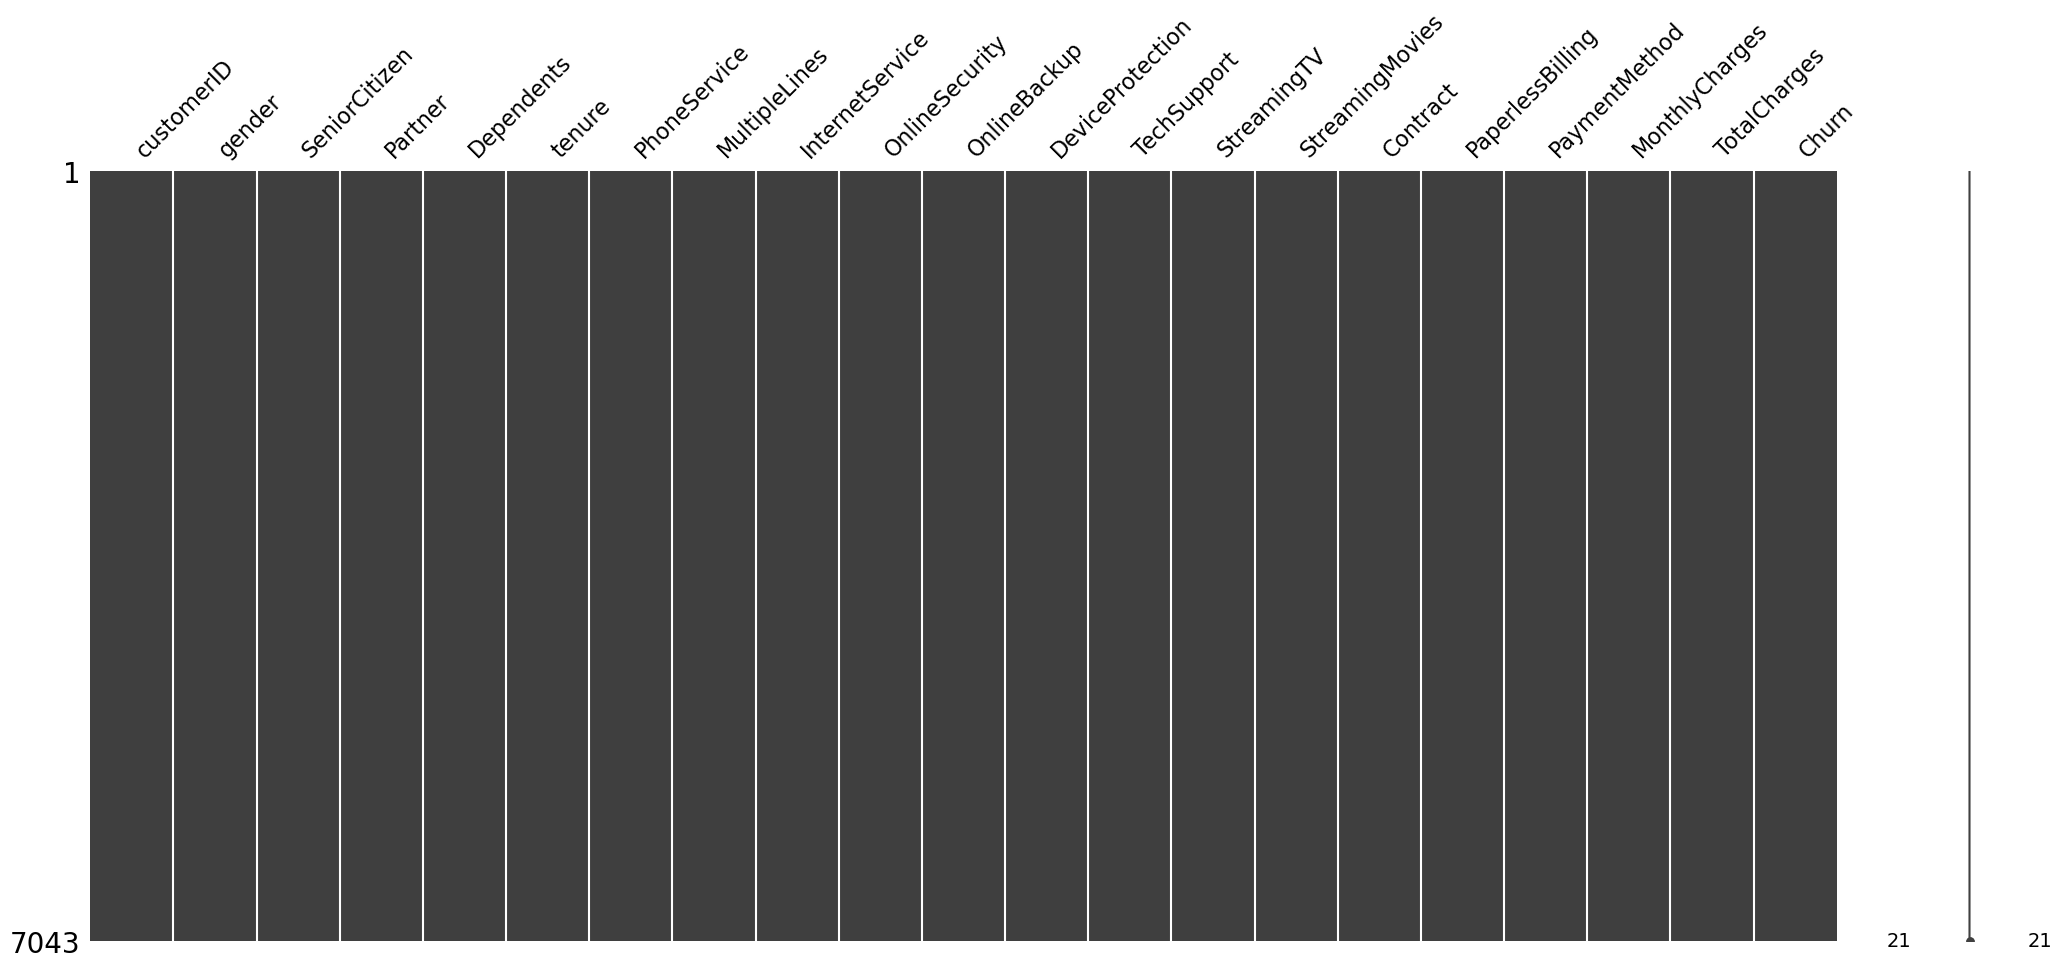

In [8]:
missingno.matrix(df)

Based on the initial dataset statistics before cleaning and feature engineering, here are some key insights:

There are no missing values in any of the 21 columns in the dataset. This indicates that:

1. Clean Dataset → All features contain complete data

2. Efficient Data Processing → With a fully populated dataset, EDA (Exploratory Data Analysis), feature engineering, and model training can proceed smoothly without interruptions due to incomplete data.

However, even though there are no missing values, further checks are still necessary, such as:

1. Checking for data inconsistencies (e.g., incorrect or misclassified categories).
2. Detecting outliers, especially in numerical columns like `SeniorCitizens`, `Tenure`, `MonthlyCharges`.
3. Analyzing data distribution to ensure there is no extreme skewness that could impact the Churn prediction model.

### 2.3.2 Data Duplicate

In [9]:
print('Proportion Duplicate from overall Data')
print(f'Total Duplicate',df.duplicated().sum())
print(f'Total Duplicate Overall',round((df.duplicated().sum()/len(df)*100),2), '%')
print('Final Statement : Didnt have any duplicate, therefore can continue to next step')

Proportion Duplicate from overall Data
Total Duplicate 0
Total Duplicate Overall 0.0 %
Final Statement : Didnt have any duplicate, therefore can continue to next step


**Reasonable Action**
1. While duplicate data could led to Bias Problem, but this DataSet **didnt have any duplicate**/**Clean**.

### 2.3.3 Data Inconsistency

In [10]:
pd.set_option('display.max_colwidth', None)
# Data unique in each Columns
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].isna().sum(), df[col].duplicated().sum(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Number Missing Value', 'Number Duplicated per Columns', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Number Missing Value,Number Duplicated per Columns,Unique Sample
0,customerID,7043,0,0,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC, 7892-POOKP, 6388-TABGU, 9763-GRSKD, 7469-LKBCI, 8091-TTVAX, 0280-XJGEX, 5129-JLPIS, 3655-SNQYZ, 8191-XWSZG, 9959-WOFKT, 4190-MFLUW, 4183-MYFRB, 8779-QRDMV, 1680-VDCWW, 1066-JKSGK, 3638-WEABW, 6322-HRPFA, 6865-JZNKO, 6467-CHFZW, 8665-UTDHZ, 5248-YGIJN, 8773-HHUOZ, 3841-NFECX, 4929-XIHVW, 6827-IEAUQ, 7310-EGVHZ, 3413-BMNZE, 6234-RAAPL, 6047-YHPVI, 6572-ADKRS, 5380-WJKOV, 8168-UQWWF, 8865-TNMNX, 9489-DEDVP, 9867-JCZSP, 4671-VJLCL, 4080-IIARD, 3714-NTNFO, 5948-UJZLF, 7760-OYPDY, 7639-LIAYI, 2954-PIBKO, 8012-SOUDQ, 9420-LOJKX, 6575-SUVOI, 7495-OOKFY, 4667-QONEA, 1658-BYGOY, 8769-KKTPH, 5067-XJQFU, 3957-SQXML, 5954-BDFSG, 0434-CSFON, 1215-FIGMP, 0526-SXDJP, 0557-ASKVU, 5698-BQJOH, 5122-CYFXA, 8627-ZYGSZ, 3410-YOQBQ, 3170-NMYVV, 7410-OIEDU, 2273-QCKXA, 0731-EBJQB, 1891-QRQSA, 8028-PNXHQ, 5630-AHZIL, 2673-CXQEU, 6416-JNVRK, 5590-ZSKRV, 0191-ZHSKZ, 3887-PBQAO, 5919-TMRGD, 8108-UXRQN, 9191-MYQKX, 9919-YLNNG, 0318-ZOPWS, 4445-ZJNMU, 4808-YNLEU, 1862-QRWPE, 2796-NNUFI, 3016-KSVCP, 4767-HZZHQ, 2424-WVHPL, 7233-PAHHL, 6067-NGCEU, 9848-JQJTX, 8637-XJIVR, 9803-FTJCG, 0278-YXOOG, 3212-KXOCR, 4598-XLKNJ, ...]"
1,gender,2,0,7041,"[Female, Male]"
2,SeniorCitizen,2,0,7041,"[0, 1]"
3,Partner,2,0,7041,"[Yes, No]"
4,Dependents,2,0,7041,"[No, Yes]"
5,tenure,73,0,6970,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]"
6,PhoneService,2,0,7041,"[No, Yes]"
7,MultipleLines,3,0,7040,"[No phone service, No, Yes]"
8,InternetService,3,0,7040,"[DSL, Fiber optic, No]"
9,OnlineSecurity,3,0,7040,"[No, Yes, No internet service]"


#### 2.3.3.1 Inconsistency column SeniorCitizen

Column `Senior Citizen` providing information about does the customer have an age greater than 65 or not, therefore we will equalizing the value across the entire data with Yes-No value

In [11]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == 1, 'Yes', 'No')

In [12]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

#### 2.3.3.2 Inconsistency column Total Charge

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print('Proportion of Missing Values from overall Data')
print('Total Missing Values:', df['TotalCharges'].isnull().sum())
print('Total Missing Values Overall:', round((df['TotalCharges'].isnull().sum() / len(df) * 100), 2), '%')
print('Final Statement: Cheking data before taking action')

Proportion of Missing Values from overall Data
Total Missing Values: 11
Total Missing Values Overall: 0.16 %
Final Statement: Cheking data before taking action


In [14]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Data with `Total Charge` with value NaN or " ", amounts to only 11 rows, which is less than 1% of the total data. 
    - Action : Therefore, this data can be deleted without having a significant impact on the overall analysis. 
        - Note : Furthermore, the presence of such a small amount of data can be considered as outliers or anomalies that may add noise and cause overfitting in the model.

- However, from the results of the inspection in column `Total Charge`, anomalies were found in the form of charge on `Monthly Charge` column, its clearly state that when even the customer have 0 (zero) tenure which indicate that customer did not already start subscription to any our services, buat we charge them already, furthermore we need to check all of `Tenure` with value 0 (zero).

In [15]:
print(f'Data Tenure with 0 (zero) Value :',(df['tenure'] == 0).sum(), 'Data Found')
display(df[df['tenure'] == 0].head(3))


Data Tenure with 0 (zero) Value : 11 Data Found


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


- The findings indicate that all value 0 (zero) in column `Tenure` are 11 data which match with amount of collumn `Total Charge` that have NaN value
    - Action : Delete Data

In [16]:
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

In [17]:
display(df.isna().sum())
display(df.info())
display(df[df['tenure'] == 0].head(3))

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


None

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


- Data has been successfully handle, with conclusion such as :
    1. Data from 7043 data --> 7032 data (11 data)
    2. Dtype Column 
        - `Senior Citizen` from int64 --> object
        - `Total Charge` from 1nt64 --> float64

#### 2.3.3.3 Inconsistency column service

Before proceeding with data analysis, it is essential to verify the consistency of customer service data related to phone and internet services. In this process, we will validate the data in the `PhoneService` and `MultipleLines` columns, as well as the `InternetService` column and other internet-related services (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).

- The objective of this verification is to ensure that:

    1. If `PhoneService` is '**No**', then `MultipleLines` should also be '**No phone service**'.
    2. If `InternetService` is '**No**', then all related internet service columns must be labeled as '**No internet service**'.

The results of this verification will be displayed as Phone Mismatch and Internet Mismatch if any inconsistencies are detected. Therefore let's proceed with the checking process.

In [18]:
phone_service_mismatch = df[(df["PhoneService"] == "No") & (df["MultipleLines"] != "No phone service")]

if not phone_service_mismatch.empty:
    print("Phone Mismatch")
else:
    print("No Phone Mismatch")

No Phone Mismatch


In [19]:
internet_columns = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
internet_service_mismatch = df[(df["InternetService"] == "No") & (df[internet_columns] != "No internet service").any(axis=1)]

if not internet_service_mismatch.empty:
    print("Internet Mismatch")
else:
    print("No Internet Mismatch")

No Internet Mismatch


#### 2.3.3.4 Inconsistency Title Columns

Inconsistent column naming can lead to confusion and potential errors in data processing. In this dataset, some columns like `customerID`, `gender`, and `tenure` use camelCase, while others use PascalCase.

- To maintain a consistent PascalCase format, we implement :

    1. Capitalizes the first letter for specific columns (`customerID`, `gender`, `tenure`).
    2. Retains the existing structure for camelCase columns while capitalizing the first letter.
    3. Applies .title() for single-word columns.

This approach ensures uniform formatting, enhancing code readability and reducing potential errors.

- Columns names before

In [20]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


- Columns names after

In [21]:
def format_column_name(col_name):
    if col_name in ["customerID", "gender", "tenure"]:
        return col_name[0].upper() + col_name[1:]
    elif col_name != col_name.lower() and col_name != col_name.upper():
        return col_name[0].upper() + col_name[1:]
    else:
        return col_name.title()

df.columns = [format_column_name(col) for col in df.columns]

print(df.columns)

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### 2.3.4 Outlier Data

Testing for outliers is essential to identify extreme values that can distort model training, bias predictions, and compromise data integrity.

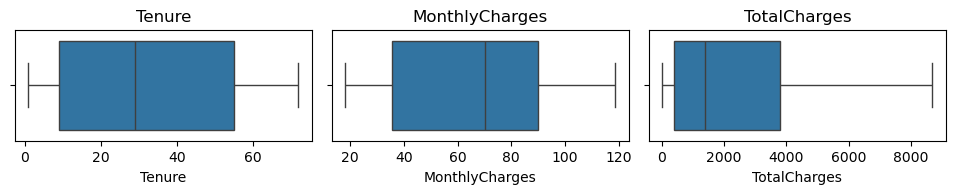

In [22]:
plt.figure(figsize=(16, 5))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

- Data didnt show any data that beyond Lower case and Upper case means
    1. That data already evenly distribute (no data extreme)
    2. The data does not have high variability
    3. All data points are within the acceptable range determined by the IQR (Interquartile Range) method.

### 2.3.5 Checking Amount of Unique in Categorical Data

Identifying the number of unique values in categorical columns is crucial for Machine Learning preprocessing because it impacts the choice of encoding and model complexity.

- Thus, counting unique values helps in strategizing encoding methods and controlling the complexity of the model.

In [23]:
print("Unique values in each object column:")
object_cols = ['CustomerID', 'Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod', 'Churn']

for col in object_cols:
    print(f"{col:17} : {df[col].nunique()} unique values")


Unique values in each object column:
CustomerID        : 7032 unique values
Gender            : 2 unique values
Partner           : 2 unique values
Dependents        : 2 unique values
PhoneService      : 2 unique values
MultipleLines     : 3 unique values
InternetService   : 3 unique values
OnlineSecurity    : 3 unique values
OnlineBackup      : 3 unique values
DeviceProtection  : 3 unique values
TechSupport       : 3 unique values
StreamingTV       : 3 unique values
StreamingMovies   : 3 unique values
Contract          : 3 unique values
PaperlessBilling  : 2 unique values
PaymentMethod     : 4 unique values
Churn             : 2 unique values


- Since there are no unique values exceeding 5 in the categorical columns, grouping is not necessary. Therefore, the Machine Learning process can proceed without the risk of overfitting due to excessive categories in these features

### 2.3.6 Explanation Data Story

Additionally, here is some information regarding the data that will be analyzed through EDA visualization.

1. The data contains information about **Telco customers who subscribe** to services at the company.
2. Data has 7032 row meaning, 
    - Each line explains the information of customers who subscribe to the service.
    - Customer ID have 7032 unique value, means **there is no duplicate customer** data in all data.
        - This indicates that we have 7,032 customers.
    - Data each row represent **recap of customer for each month** this validate with 
        - Column `monthly charge` which indicate that customer is charged with bill monthly.
        - Column `Tenure` which counting customer who subs to our services each month
         - source Tenure Monthly [Click Here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data).
3. Data has been released 7 years ago meaning, if we counting from 2025
    - 2025 - 7 years = **2018**
    - Data recap from region **California State** from **Qaurtal 3 (July, August, September)**.
        - source Monthly [Click Here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data).

4. Behavioral Indicators of Churn (Telco-Specific Evidence)
    - References:
        - Ericsson ConsumerLab (2023): Found a 72% correlation between 3-month usage decline and subsequent churn in European telcos.
        - AT&T Retention Whitepaper (2022): Uses "30-day usage deviation alerts" to flag at-risk customers.
        - Oracle Communications Data Model: Includes "ARPOU (Average Revenue Per User) trend" as a churn predictor.
    

## 2.4 Saving Clean Data

In [24]:
print(f'''DF Data Statistics shows that the data after cleaning and engineering has
Total Row               : {df.shape[0]} from 7043
Total Column            : {df.shape[1]} from 21
Columns are object      : {df.dtypes.value_counts()[0]} from 18
Columns are int64       : {df.dtypes.value_counts()[2]} from 2
Columns are float64     : {df.dtypes.value_counts()[1]} from 1''')

DF Data Statistics shows that the data after cleaning and engineering has
Total Row               : 7032 from 7043
Total Column            : 21 from 21
Columns are object      : 18 from 18
Columns are int64       : 1 from 2
Columns are float64     : 2 from 1


In [25]:
def format_column_name(col_name):
    if col_name in ["customerID", "gender", "tenure"]:
        return col_name[0].upper() + col_name[1:]
    elif col_name != col_name.lower() and col_name != col_name.upper():
        return col_name[0].upper() + col_name[1:]
    else:
        return col_name.title()

df.columns = [format_column_name(col) for col in df.columns]

print(df.columns)

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [26]:
# RUN THIS to save as EXCEL
#df.to_excel('Data_Telco_Clean.xlsx', index=False)

# RUN THIS to save as csv
# df.to_csv('Data_Telco_Clean.csv', index=False)

# RUN THIS to save as JSON
#df.to_json('Data_Telco_Clean.json', index=False)

---

# 3. EDA (Explanation Data Analysis)

The company aims to identify the key factors that drive customer churn (customers discontinuing service subscriptions). By conducting churn analysis, the company can formulate mitigation strategies to retain customers and enhance profitability.

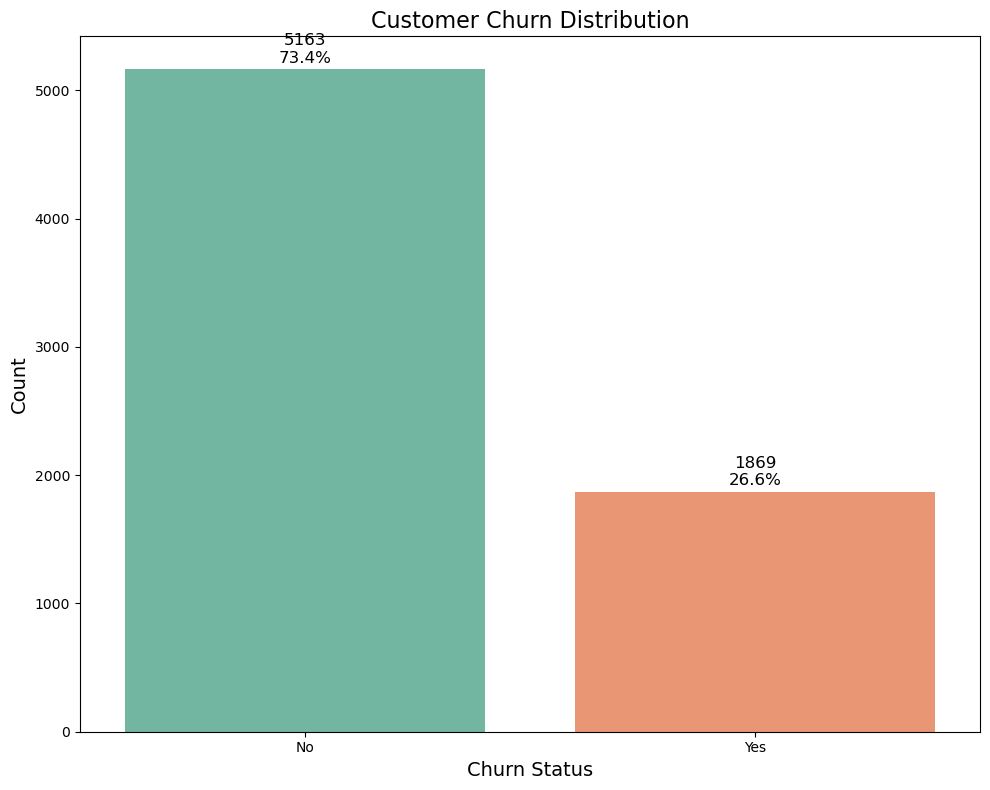

In [27]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution', fontsize=16)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

total = float(len(df))
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    label = f'{count}\n{percentage:.1f}%'
    
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 30
    
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


- **Insight**: 
    - The plot shows the percentage of customers who churned vs. those who stayed. Typically in telecom, we see churn rates between 15-30%. This baseline helps us understand the scale of the problem.
        - Source Churn Rate Telco [Click Here](https://unscrambl.com/blog/reduce-customer-churn-for-telcos-data-driven-approach/).

The company aims to identify the key factors that drive customer churn (customers discontinuing service subscriptions). By conducting churn analysis, the company can formulate mitigation strategies to retain customers and enhance profitability.

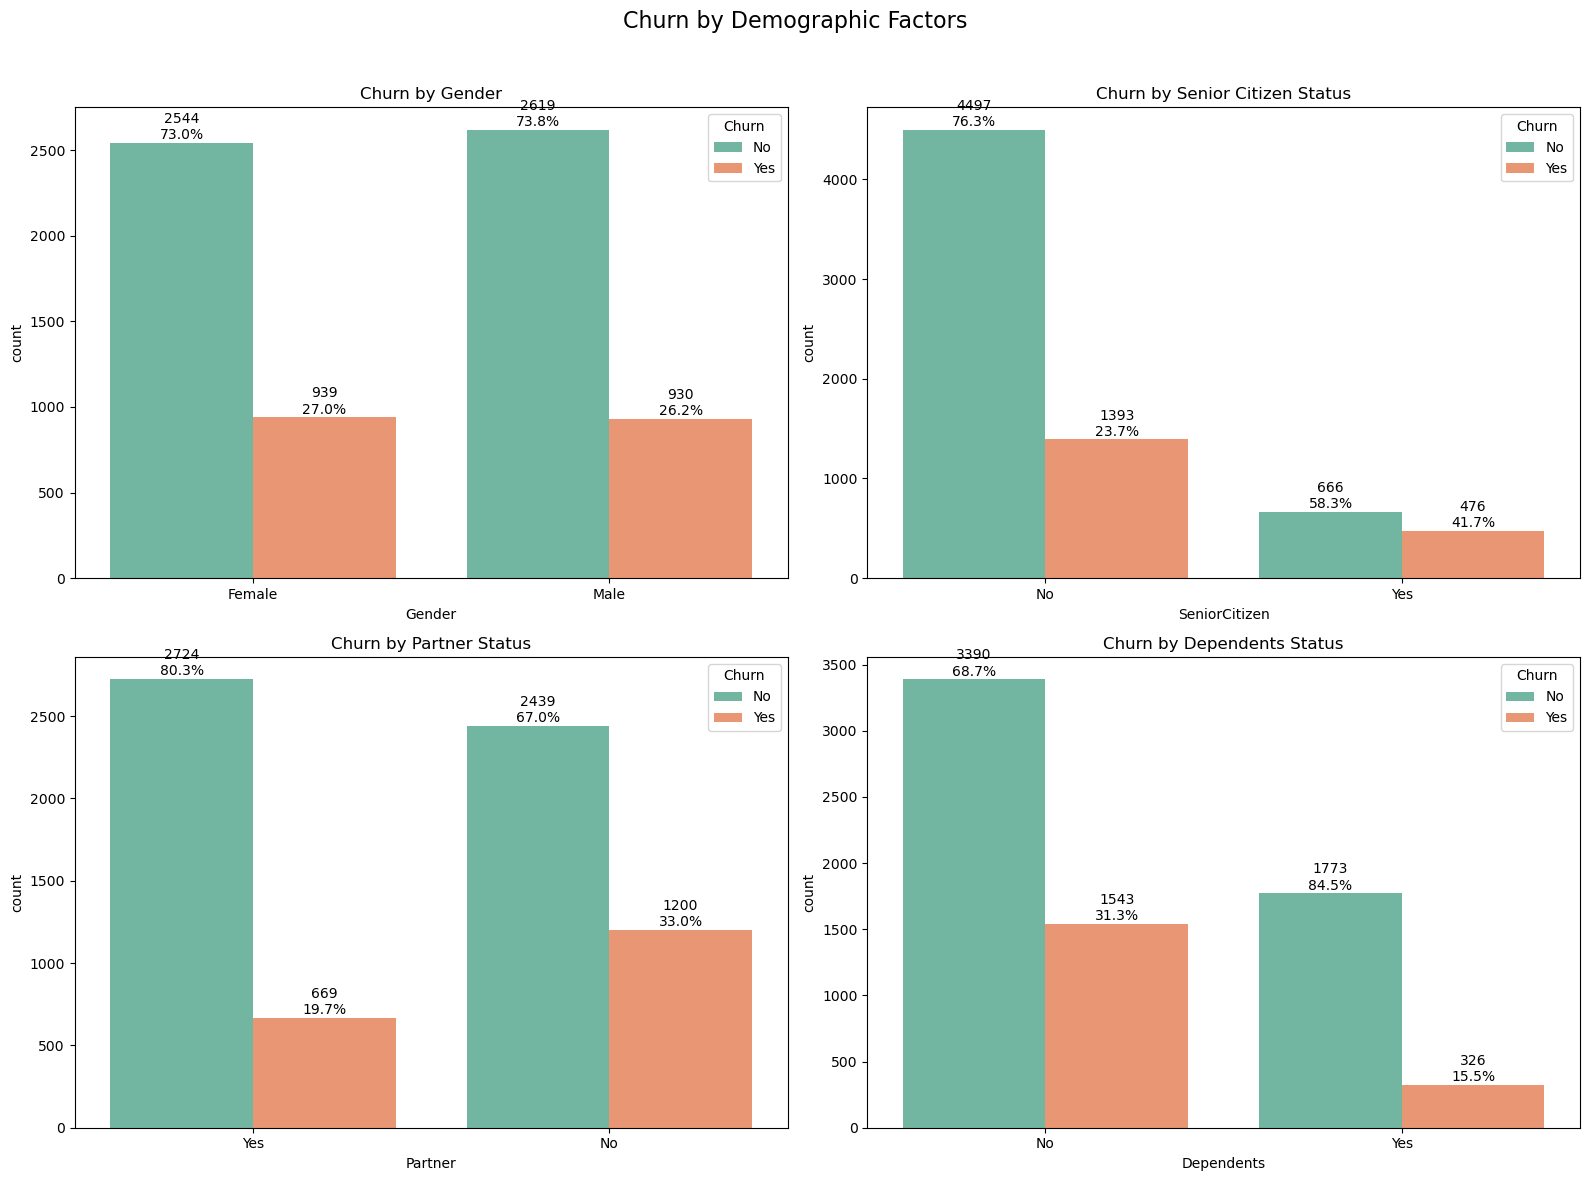

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Churn by Demographic Factors', fontsize=16)

def add_percentages(ax, category_col):
    total_per_category = df.groupby(category_col).size()
    counts = df.groupby([category_col, 'Churn']).size().reset_index(name='count')
    
    n_categories = df[category_col].nunique()
    churn_labels = df['Churn'].unique()

    for i, p in enumerate(ax.patches):
        height = p.get_height()
        if height == 0:
            continue

        x = p.get_x() + p.get_width() / 2
        y = height + 5

        category_idx = i % n_categories
        churn_idx = i // n_categories

        category_label = ax.get_xticklabels()[category_idx].get_text()
        churn_label = churn_labels[churn_idx]

        total = total_per_category[category_label]
        count_row = counts[(counts[category_col] == category_label) & (counts['Churn'] == churn_label)]

        count = int(count_row['count'].values[0]) if not count_row.empty else 0
        percent = count / total * 100

        ax.annotate(f'{count}\n{percent:.1f}%', (x, y), ha='center', va='bottom', fontsize=10, color='black')

sns.countplot(x='Gender', hue='Churn', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Churn by Gender')
add_percentages(axes[0, 0], 'Gender')

sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Churn by Senior Citizen Status')
add_percentages(axes[0, 1], 'SeniorCitizen')

sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Churn by Partner Status')
add_percentages(axes[1, 0], 'Partner')

sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Churn by Dependents Status')
add_percentages(axes[1, 1], 'Dependents')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- The churn analysis is further segmented by key demographic factors to understand how different customer profiles are associated with churn. The following visualizations have been generated:

    1. Gender: Analyzes churn distribution based on customer gender.
    2. Senior Citizen: Examines churn rates for senior citizens versus non-senior customers.
    3. Partner Status: Investigates the impact of having a partner on churn rates.
    4. Dependents: Analyzes the relationship between having dependents and churn.

- **Insight**: 
    - Senior citizens and customers without partners or dependents tend to have higher churn rates. This suggests these groups may need special retention efforts.

In our effort to optimize customer retention and enhance business profitability, it is crucial to understand the factors that influence customers' decisions to discontinue using our services (churn). This analysis explores the relationship between various services we offer and the churn rates among our customers.

- The services examined include phone service, internet connectivity, device protection, technical support, and streaming options. By visualizing the churn proportions across each service category, we aim to identify patterns and pinpoint which services experience higher or lower churn rates.

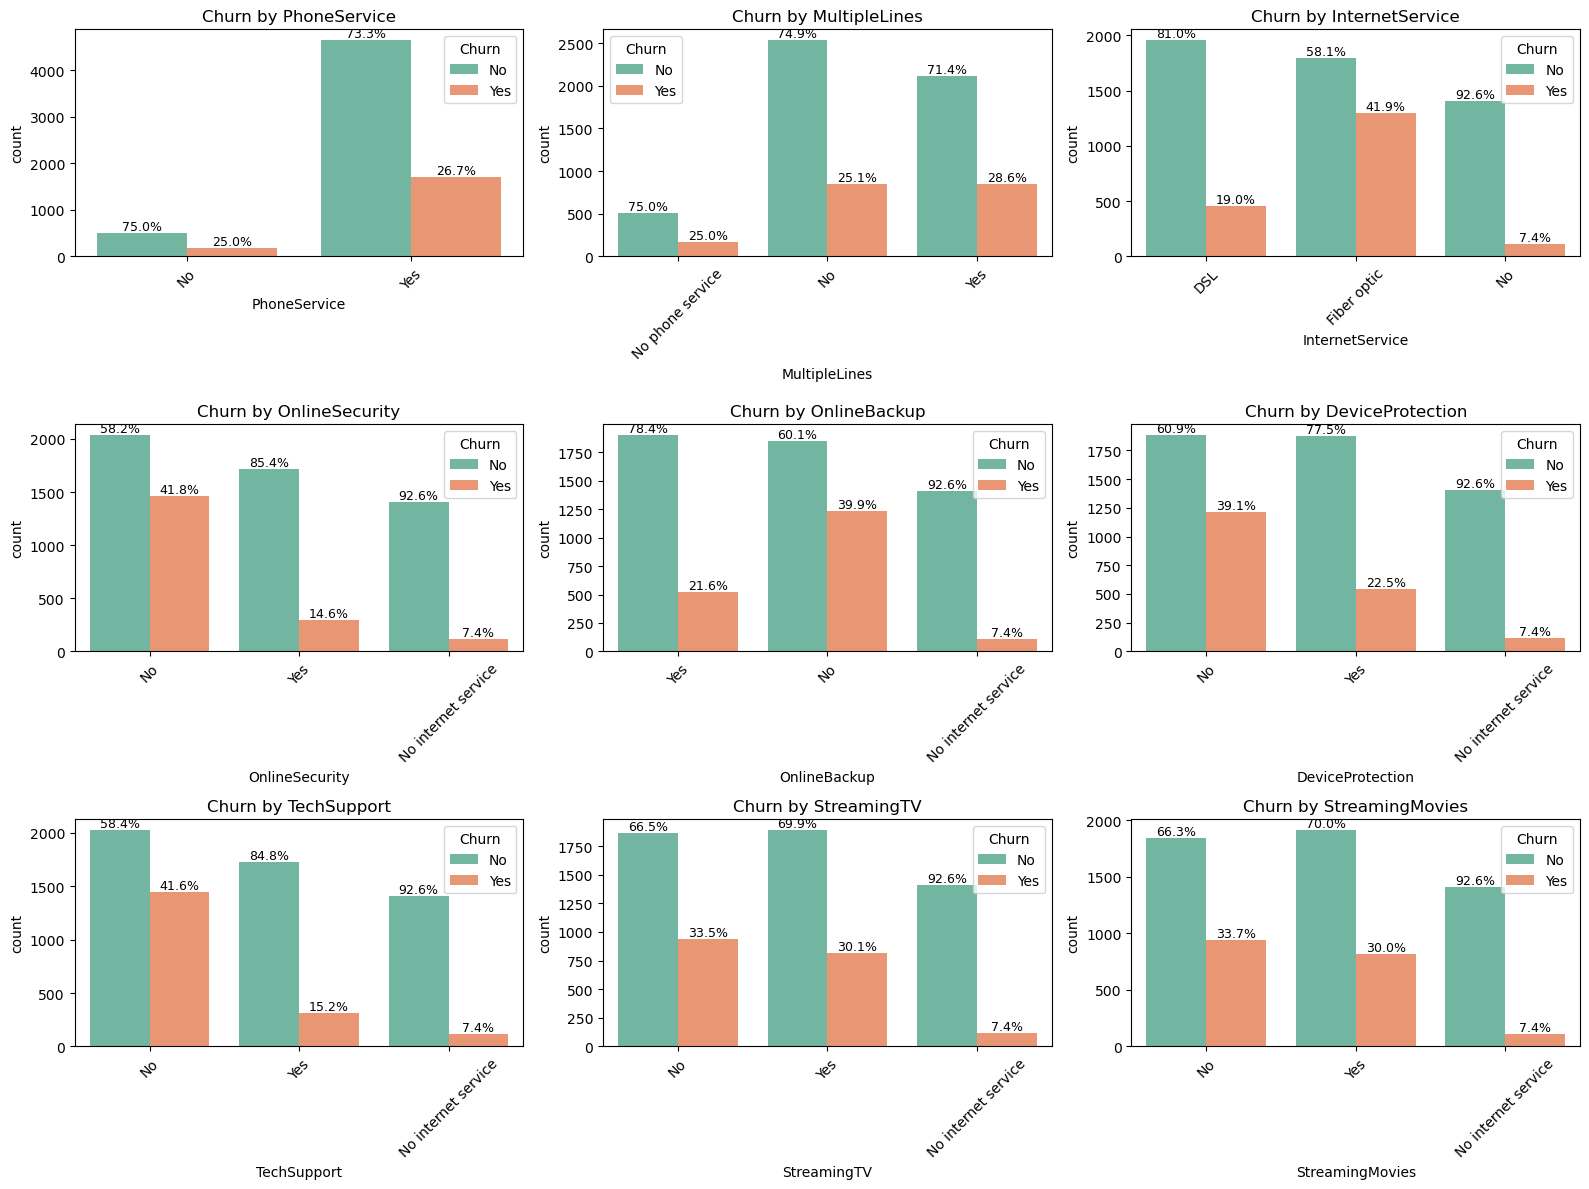

In [29]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(16, 12))

for i, service in enumerate(services, 1):
    plt.subplot(3, 3, i)

    ax = sns.countplot(x=service, hue='Churn', data=df, palette='Set2')
    plt.title(f'Churn by {service}')
    plt.xticks(rotation=45)

    total_per_category = df.groupby(service).size()

    counts = df.groupby([service, 'Churn']).size().reset_index(name='count')
    
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
 
        x = p.get_x() + p.get_width() / 2
        y = height
 
        n_categories = df[service].nunique()

        j = ax.patches.index(p)

        category_idx = j % n_categories
        churn_idx = j // n_categories  

        category_label = ax.get_xticklabels()[category_idx].get_text()

        churn_labels = df['Churn'].unique()
        churn_label = churn_labels[churn_idx]

        total = total_per_category[category_label]

        count = counts[(counts[service] == category_label) & (counts['Churn'] == churn_label)]['count']
        count = int(count) if not count.empty else 0

        percent = count / total * 100

        ax.annotate(f'{percent:.1f}%', (x, y), ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

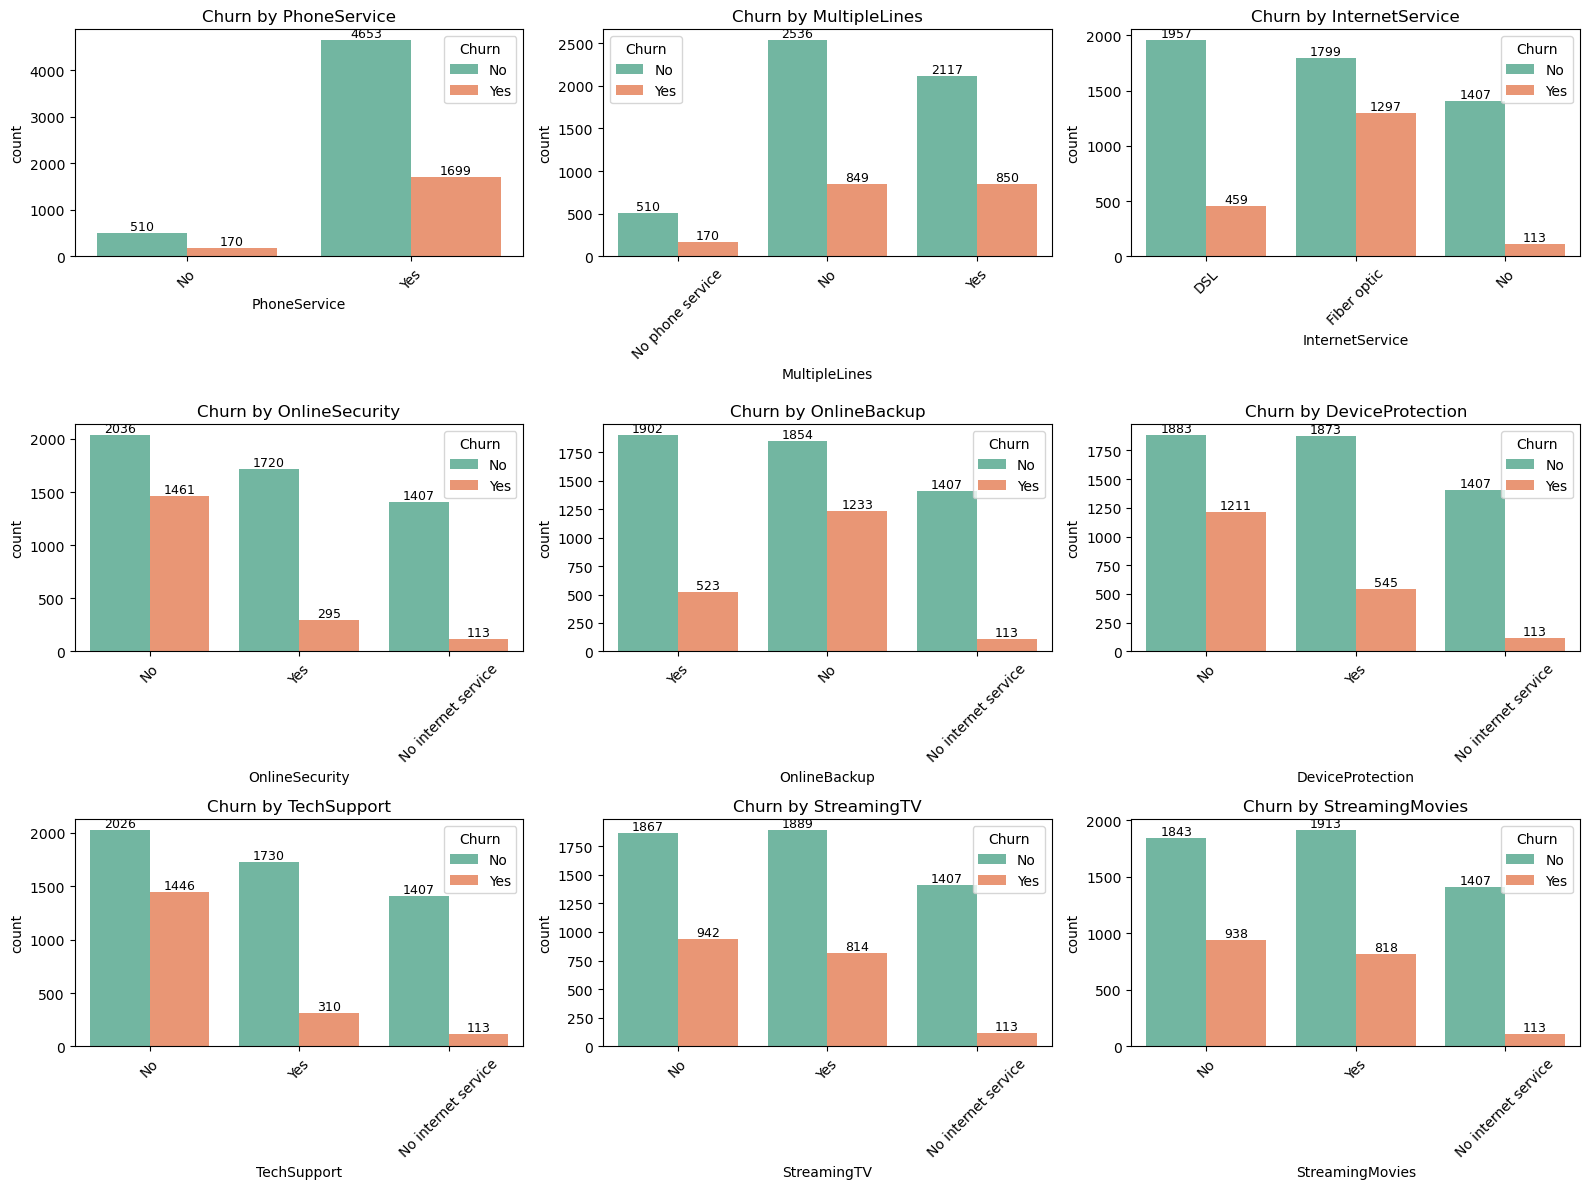

In [30]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(16, 12))

for i, service in enumerate(services, 1):
    plt.subplot(3, 3, i)
    
    ax = sns.countplot(x=service, hue='Churn', data=df, palette='Set2')
    plt.title(f'Churn by {service}')
    plt.xticks(rotation=45)

    total_per_category = df.groupby(service).size()
    counts = df.groupby([service, 'Churn']).size().reset_index(name='count')

    service_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    churn_labels = df['Churn'].unique()

    n_service = len(service_labels)

    for j, p in enumerate(ax.patches):
        height = p.get_height()
        if height == 0:
            continue

        x = p.get_x() + p.get_width() / 2
        y = height

        service_idx = j % n_service
        churn_idx = j // n_service

        service_val = service_labels[service_idx]
        churn_val = churn_labels[churn_idx]

        count_row = counts[(counts[service] == service_val) & (counts['Churn'] == churn_val)]
        count = int(count_row['count'].values[0]) if not count_row.empty else 0

        ax.annotate(f'{count}', (x, y), ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

- **Insight**: 
    - Customers with Fiber optic internet service and those without online security, tech support, or device protection have significantly higher churn rates. These service factors appear to be strong predictors of churn.

In this analysis, we present data visualization related to customer churn rates based on contract type and payment method. This visualization is part of a series of tests to understand specific patterns that may contribute to customer churn rates in the company. By using a countplot visualization, we can identify the distribution of churn based on contract types (Month-to-month, One year, Two year) and the payment methods used by customers.

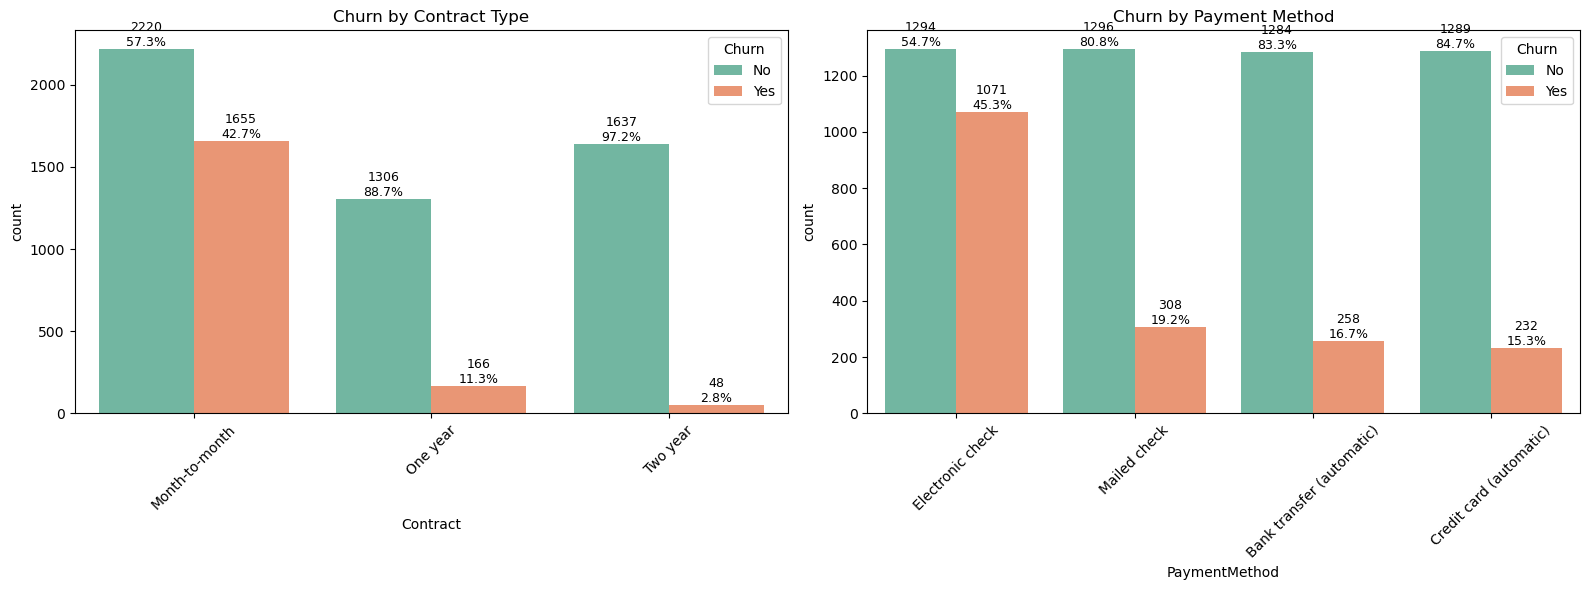

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0], palette='Set2',
              order=['Month-to-month', 'One year', 'Two year'])
axes[0].set_title('Churn by Contract Type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Churn by Payment Method')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

def annotate_count_and_percent(ax, category_col, hue_col):
    total_per_category = df.groupby(category_col).size()
    counts = df.groupby([category_col, hue_col]).size().reset_index(name='count')

    n_hue = df[hue_col].nunique()
    category_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    hue_labels = df[hue_col].unique()

    for i, p in enumerate(ax.patches):
        height = p.get_height()
        if height == 0:
            continue

        x = p.get_x() + p.get_width() / 2
        y = height

        category_idx = i % len(category_labels)
        hue_idx = i // len(category_labels)

        category_label = category_labels[category_idx]
        hue_label = hue_labels[hue_idx]

        total = total_per_category[category_label]
        count = counts[(counts[category_col] == category_label) &
                       (counts[hue_col] == hue_label)]['count']
        count = int(count) if not count.empty else 0

        percent = count / total * 100

        ax.annotate(f'{count}\n{percent:.1f}%', (x, y), ha='center', va='bottom', fontsize=9, color='black')

annotate_count_and_percent(axes[0], 'Contract', 'Churn')
annotate_count_and_percent(axes[1], 'PaymentMethod', 'Churn')

plt.tight_layout()
plt.show()


- **Insight**: 
    - Month-to-month contracts and electronic check payment methods are associated with much higher churn rates. Customers with longer-term contracts are more stable.

At this stage, an analysis is conducted to understand the relationship between customer churn and the variables Monthly Charges and Tenure. A boxplot visualization is used to identify the differences in the distribution of Monthly Charges and Tenure values based on the customer churn status. Through this analysis, it is expected to gain insights into the characteristics of customers who tend to churn, whether they are more likely to be those with high monthly fees or those with shorter subscription durations.

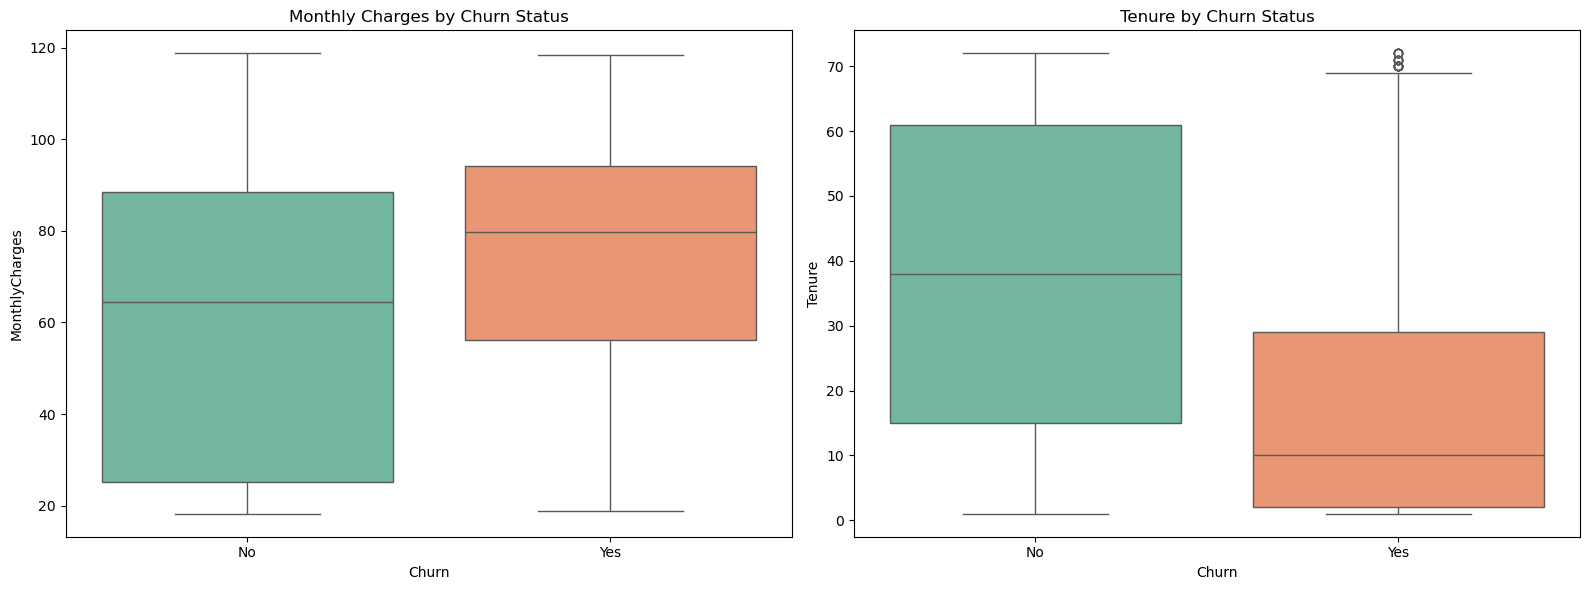

In [32]:
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges by Churn Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')
plt.title('Tenure by Churn Status')

plt.tight_layout()
plt.show()

- **Insight**: 
    - Customers who churn tend to have higher monthly charges but lower tenure (shorter time with the company). This suggests that newer customers paying higher prices may be at risk.

In this analysis, we assess feature correlations to identify key factors influencing customer churn. By encoding categorical variables (excluding CustomerID) and visualizing the correlation matrix, we can pinpoint features with strong positive (blue) or negative (red) relationships. This helps in selecting relevant features for predictive modeling and strategic business insights.

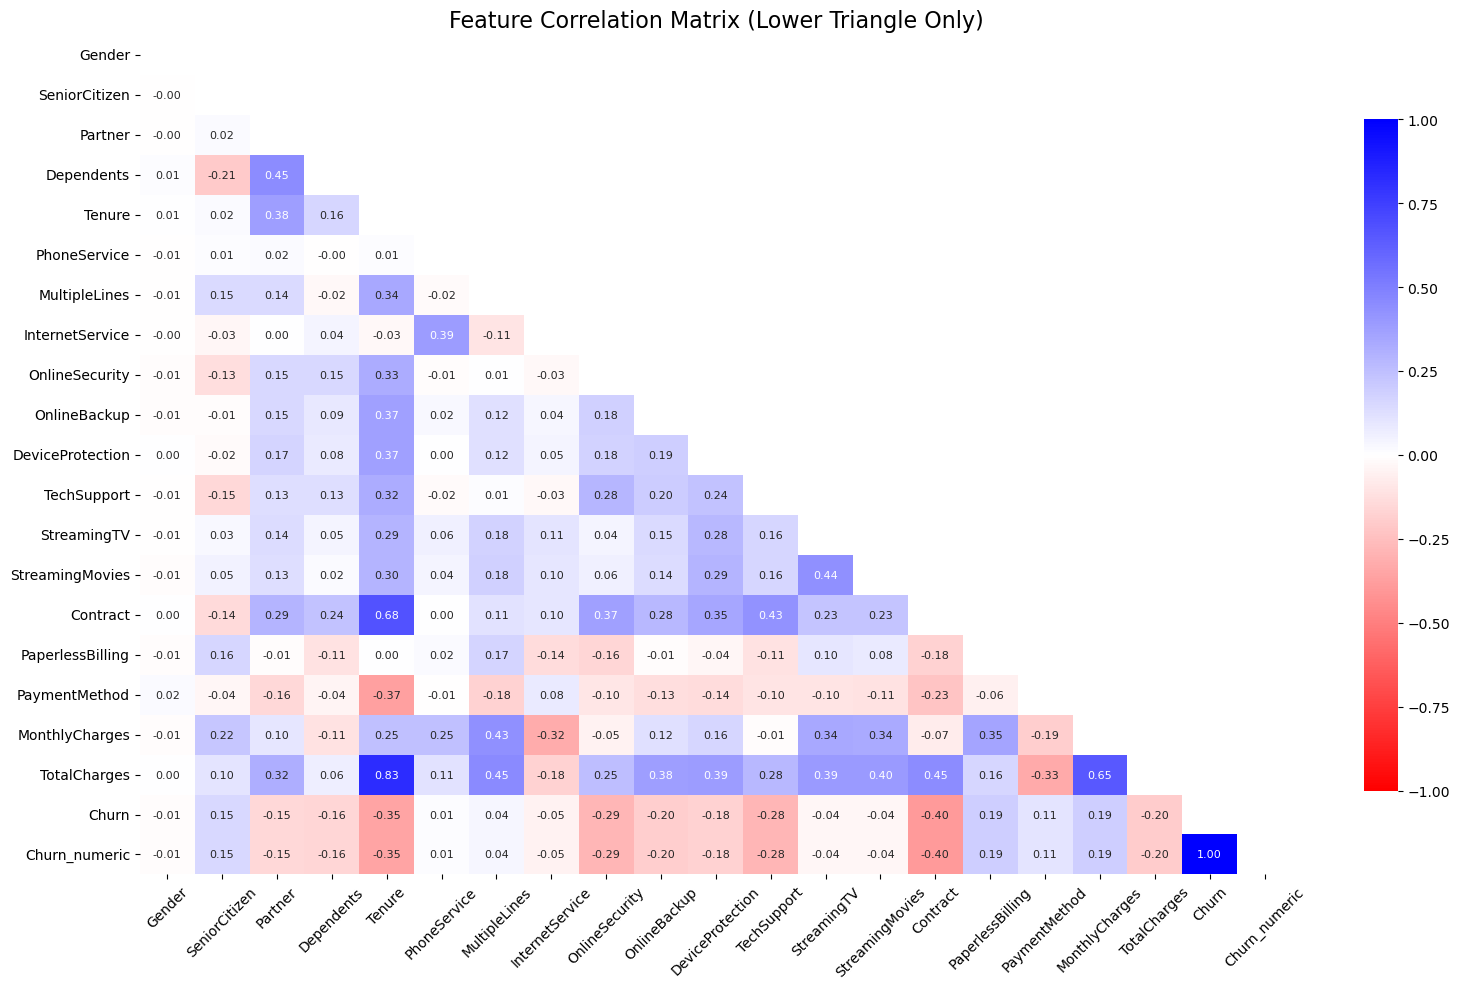

In [33]:
df_encoded = df.copy()

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Identifikasi kolom kategorikal, kecuali CustomerID
exclude_cols = ['CustomerID']
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col not in exclude_cols]

# Encode kolom kategorikal
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# Hapus kolom CustomerID
df_encoded = df_encoded.drop('CustomerID', axis=1)

# Hitung matriks korelasi
corr = df_encoded.corr()

# Definisikan colormap dua warna dengan gradasi
colors = ["#ff0000", "#ffffff", "#0000ff"]  # Merah → Putih → Biru
custom_cmap = LinearSegmentedColormap.from_list("two_color_grad", colors)

# Mask untuk hanya menampilkan segitiga bagian bawah
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap=custom_cmap, 
            annot_kws={"size": 8}, vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (Lower Triangle Only)', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

- **Insight**: 
    - The heatmap shows strong correlations between churn and factors like contract type, internet service type, and online security. These should be prioritized in retention strategies.

This visualization aims to provide a clear and intuitive overview of which services are most widely used and the proportion of users based on their chosen type of internet service (DSL, Fiber optic, or no internet service). Such insights are crucial for supporting strategic business decisions, including marketing planning, product development, and customer retention strategies.

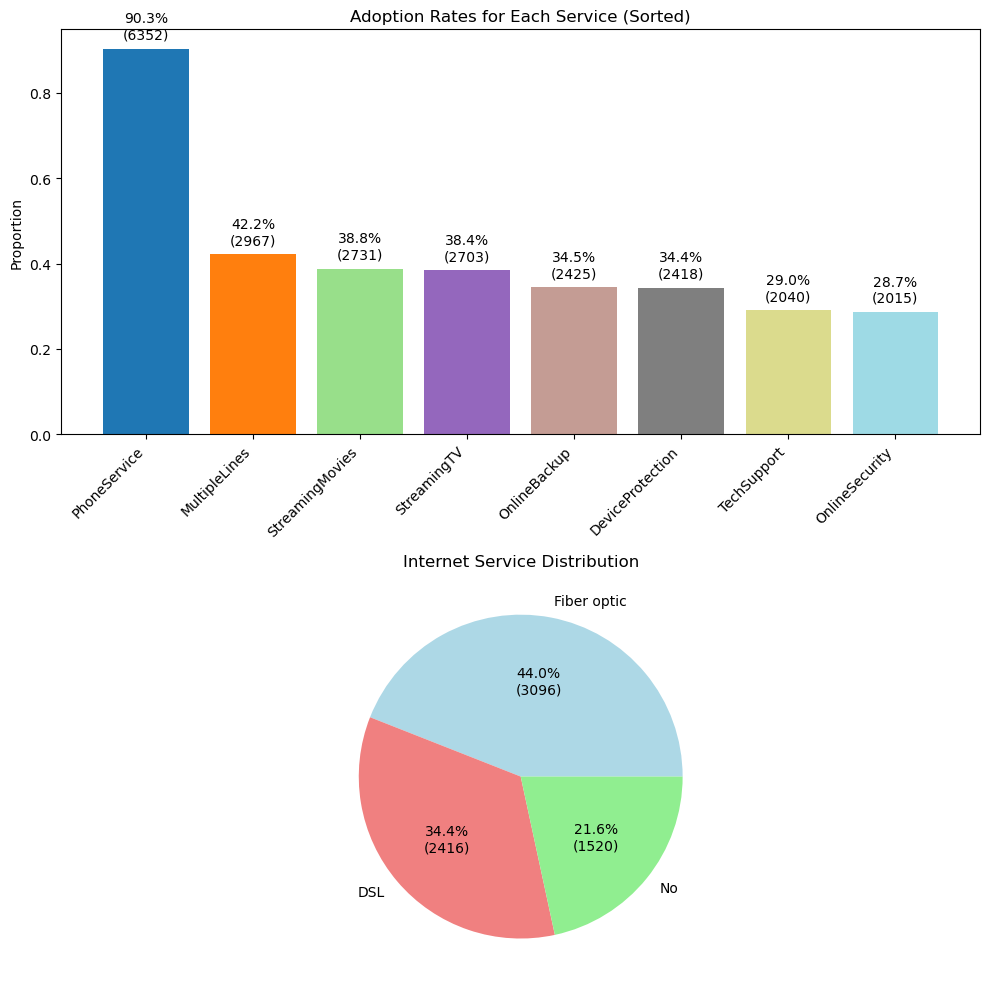

In [34]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

adoption_rates = {
    service: df[service].value_counts(normalize=True).get('Yes', 0)
    for service in services
}

adoption_counts = {
    service: df[service].value_counts().get('Yes', 0)
    for service in services
}

sorted_services = sorted(adoption_rates.items(), key=lambda x: x[1], reverse=True)

services_sorted = [item[0] for item in sorted_services]
rates_sorted = [item[1] for item in sorted_services]
counts_sorted = [adoption_counts[service] for service in services_sorted]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
colors = plt.cm.tab20(np.linspace(0, 1, len(rates_sorted)))

bars = axs[0].bar(services_sorted, rates_sorted, color=colors)
axs[0].set_title('Adoption Rates for Each Service (Sorted)')
axs[0].set_ylabel('Proportion')
axs[0].set_xticks(range(len(services_sorted)))
axs[0].set_xticklabels(services_sorted, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    axs[0].annotate(f'{height * 100:.1f}%\n({counts_sorted[i]})',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom')

internet_counts = df['InternetService'].value_counts()
internet_dist = internet_counts / internet_counts.sum()

axs[1].pie(internet_dist, labels=internet_dist.index,
           autopct=make_autopct(internet_counts),
           colors=['lightblue', 'lightcoral', 'lightgreen'])
axs[1].set_title('Internet Service Distribution')

plt.tight_layout()
plt.show()


- **Insight**:

    - Findings:
        1. PhoneService adoption: ~90%
        2. MultipleLines adoption: ~42% of phone service users
        3. Fiber optic is the most popular internet service (about 44%), followed by DSL (34%)
        4. OnlineSecurity: ~29% adoption
        5. OnlineBackup: ~34% adoption
        6. DeviceProtection: ~34% adoption
        7. TechSupport: ~29% adoption
        8. StreamingTV: ~38% adoption
        9. StreamingMovies: ~39% adoption

    - Capitalizing on the high adoption of Phone Service and the growth potential in OnlineSecurity, TechSupport, and streaming services can significantly boost revenue. Additionally, transitioning DSL users to Fiber optic and converting non-internet users present further growth opportunities. By strategically bundling services and targeting specific customer segments, the business can maximize customer lifetime value and enhance service adoption rates effectively.

To identify high-potential service bundles based on customer usage patterns, aiming to increase customer retention, ARPU (Average Revenue Per User), and cross-sell opportunities.

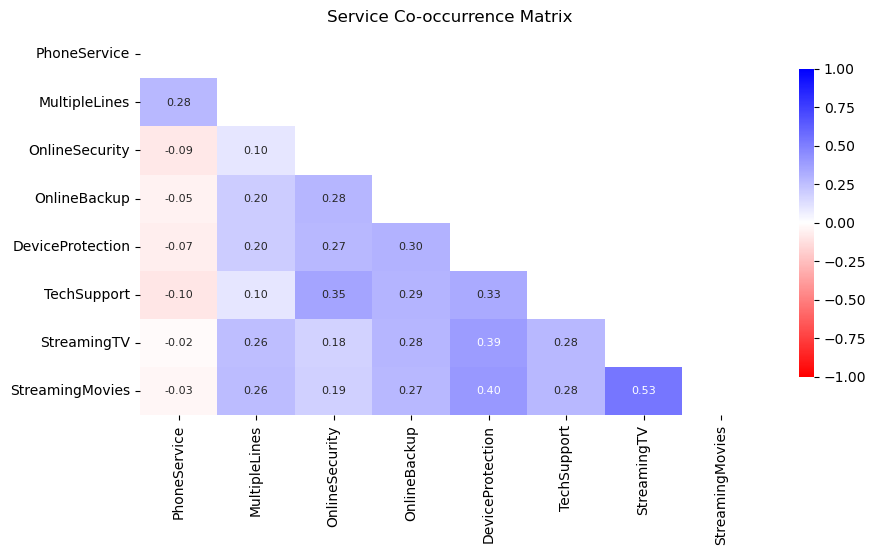

In [35]:
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
service_df = df[service_columns].apply(lambda x: x == 'Yes').astype(int)
correlation_matrix = service_df.corr()

plt.figure(figsize=(10, 5))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=custom_cmap, annot_kws={'size': 8}, vmin=-1, vmax=1, mask=mask, cbar_kws={'shrink': 0.8})
plt.title('Service Co-occurrence Matrix')
plt.show()

- **Insight**:
   - Strongest Co-occurrence: StreamingTV & StreamingMovies (0.53)
      - Over half of customers who subscribe to one of these services tend to subscribe to the other. This suggests a strong synergy and demand for combined entertainment offerings.

   - DeviceProtection shows strong associate with other Online Service (0.30 - 0.40)
      - Optionally upsell with Streaming services to tech-savvy users who value device safety and media access.

   - OnlineSecurity and TechSupport (0.35)
      - Customers concerned with security often require reliable support, creating a natural bundle for digitally cautious customers.
   
   - MultipleLines co-occurs moderately with StreamingTV (0.26) and StreamingMovies (0.26)
      - Multiple line users are likely to appreciate multi-user access to streaming content.

This analysis focuses on identifying churn patterns among telecom customers using key behavioral metrics such as Monthly Charges, Total Charges, Tenure, and Internet Service type. By visualizing these relationships, we aim to extract actionable business insights that can support strategic decision-making for improving customer retention and optimizing pricing models.

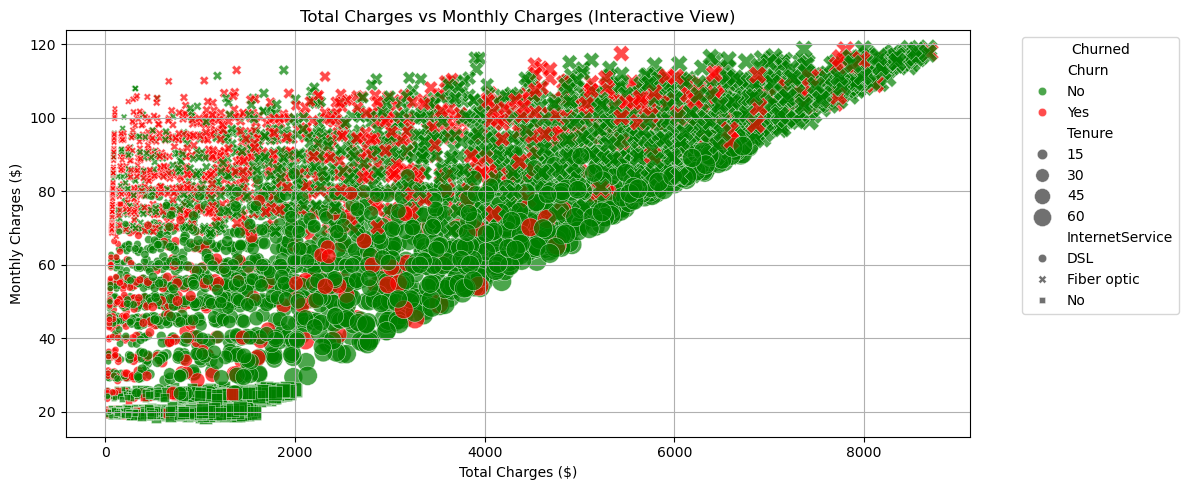

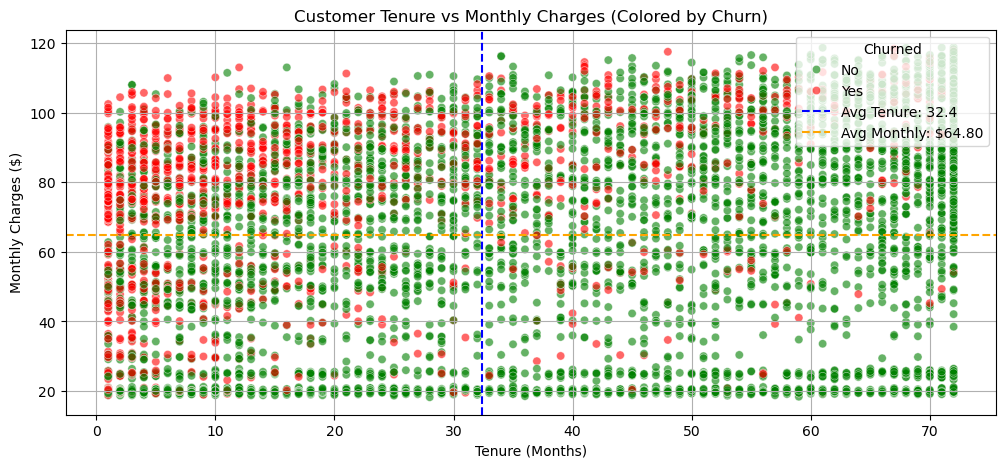

In [36]:
df['ChurnNumeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


plt.figure(figsize=(12, 5))
scatter = sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', 
                          hue='Churn', style='InternetService',
                          size='Tenure', sizes=(20, 200),
                          palette={'No':'green', 'Yes':'red'}, alpha=0.7)
plt.title('Total Charges vs Monthly Charges (Interactive View)')
plt.xlabel('Total Charges ($)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churned', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='Tenure', y='MonthlyCharges', hue='Churn', 
                palette={'No':'green', 'Yes':'red'}, alpha=0.6)

avg_tenure = df['Tenure'].mean()
avg_monthly = df['MonthlyCharges'].mean()

plt.axvline(avg_tenure, color='blue', linestyle='--', linewidth=1.5, label=f'Avg Tenure: {avg_tenure:.1f}')
plt.axhline(avg_monthly, color='orange', linestyle='--', linewidth=1.5, label=f'Avg Monthly: ${avg_monthly:.2f}')

plt.title('Customer Tenure vs Monthly Charges (Colored by Churn)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churned', loc='upper right')
plt.grid(True)
plt.show()

- **Insight**:
    1. Figure 1
        - Low Total Charges, High Churn:
            - Customers who churned (red) mostly have low total charges, indicating they left early in their subscription lifecycle.
        - High Monthly Charges Increase Churn Risk:
            - Many churned customers are concentrated in the $70–$110 monthly charge range, suggesting pricing sensitivity.
        - Fiber Optic Users Have Higher Churn Rates:
            - Churn is more common among fiber optic users (x markers), implying dissatisfaction or value mismatch.
    
    2. Figure 2
        - Early Tenure, High Churn:
            - Churned customers are mostly within the first 20 months, highlighting the critical period for retention.
        - High Monthly Charges + Short Tenure = High Risk:
            - Customers in this segment are most likely to churn, signaling a need for early value delivery.
        - Loyal Customers Accept Price Variation:
            - Customers with tenure >50 months show low churn across various price points.

---

# 4. Insight & Recommendation Business

## 4.1 Business Decision Consideration

1. The **Overall Churn Rate is Significant** (26.5%)
    - Data: 
        1. **26.5%** of customers churned, while 73.5% remained.
    - Insight: 
        - A churn rate above 25% is **concerning**, as acquiring new customers is typically 5x more expensive than retaining existing ones.
    - Business Decision: 
        - The company must **prioritize customer retention strategies** to reduce revenue loss and improve long-term profitability.


---

2. Senior Citizens, Singles, and Customers Without Dependents **Churn More**
    - Data:
        1. Senior Citizens: **41% churn rate** (Compare with 23% for non-seniors).
        2. Customers without partners: **33% churn rate** (Compare with 20% with partners).
        3. Customers without dependents: **31% churn rate** (Compare with 15% with dependents).

    - Insight: 
        - These groups **may feel less tied to the service or may be more price-sensitive**.

    - Business Decision:
        - Senior Citizen Discounts: Offer **loyalty discounts** for long-term senior customers .
        - Family & Partner Plans: **Introduce bundled services** for couples or families to increase bonding.
        - Personalized Retention Offers: Target single-person households with **period promotions**.

---

3. Month-to-Month Contracts & Electronic Check Payers **Churn Most**
    - Data:
        1. Month-to-Month Contracts: **43% churn rate** (Compare with 12% for 1-year, 3% for 2-year).
        2. Electronic Check Users: **34% churn rate** (Compare with 16% for automatic payments).

    - Insight:
        - Short-term contracts indicate **lower commitment**.
        - Manual payments **may lead to missed bills and involuntary churn**.

    - Business Decision:
        - Incentivize Longer Contracts: **Offer discounts** for 1-year/2-year commitments.
        - Auto-Payment Discounts: **Provide a (up to 20)% discount** for customers using auto-pay.
            - Discount amount calcualtion from total revenue clean last year with consideiring competitor discount
            - Source Discount Telkom [Click Here](https://www.telkom.co.id/sites/news-resources/en_US/news/telkom-synergizes-with-himbara-provides-ease-for-indihome-bill-payment-858)
        - Flexible Mid-Term Plans: **Introduce (up to 12)-month contracts** as a stepping stone.
            - Source Month Plan Telkom [Click Here](https://www.telkom.co.id/sites/news-resources/en_US/news/telkom-synergizes-with-himbara-provides-ease-for-indihome-bill-payment-858)

---

## 4.2 Business Proposal Consideration

1. **Bundling Services**
    - "Stream Saver Bundle" (30 Mbps Internet + Streaming TV/Movies at IDR 320,000/month)
        - Add a free 3-month trial of OnlineSecurity to reduce churn.
        - Target: Young adults without dependents or partners.
            - Reference: IndiHome 30 Mbps Internet + TV package priced at IDR 320,000/month.

    - "Family Shield Bundle" (50 Mbps Internet + TV + Phone at IDR 465,000/month)
        - Include free device protection for the first year.
        - Target: Families with children (lowest churn segment).
            - Reference: IndiHome 50 Mbps Internet + TV + Phone package priced at IDR 465,000/month.
    
    - Source Indihome Pricing [Click Here](https://www.telkomsel.com/indihome).

2. **Add-On Services**
    - OnlineSecurity Add-on: IDR 50,000 – 70,000/month.
    - Premium Streaming Access (Netflix, Disney+): IDR 50,000 – 100,000/month.
    - Mobile Data Add-on (for bundles like XL SATU): IDR 50,000 – 85,000/month

    - Source Indihome AddOn [Click Here](https://www.telkomsel.com/indihome/addon/upgradespeed).

3. **Pricing Tiers**
    - Implement stepped pricing to keep customers below key psychological thresholds ( < IDR 500,000):
        - Base Plan: IDR 265,000 – 295,000 (Internet only - 30 Mbps).
            - Reference: IndiHome 30 Mbps Internet-only package priced at IDR 265,000/month. 
        - Preferred Plan: IDR 320,000 – 370,000 (Internet + TV - 30 Mbps).
            - Reference: IndiHome 30 Mbps Internet + TV package priced at IDR 320,000/month.
        - Premium Plan: IDR 465,000 – 515,000 (Internet + TV + Phone - 50 Mbps).
            - Reference: IndiHome 50 Mbps Internet + TV + Phone package priced at IDR 465,000/month.

    - Source Indihome Pricing [Click Here](https://www.telkomsel.com/indihome).

4. **Contract Engage Benefit**
    - Offer 10% - 20% discount for converting month-to-month to 1-year contract.
    - "Lock-and-Save" program: Price guarantee for 2-year signups.

5. **Retention Approach**
    - Churn Risk Response:
        - Identify high-spending customers (spending > IDR 500,000/month) showing signs of churn.
        - Offer free service upgrades for users with tenure exceeding 12 months.    
    - Loyalty Rewards:
        - Provide monthly rewards or exclusive perks for customers spending above IDR 500,000/month.

---

# Link Tableu

Visualization in TableuPublic [Click Here](https://public.tableau.com/app/profile/shafy.hafidz/viz/shared/WG3YPX544).

---

# 5. Modelling Process

## 5.1 Define Feature and Label

In [37]:
variables = [
    ["X", "Feature", "Feature is an input variable used to train the model. A collection of features represents information or attributes that help the model understand the data."],
    ["", "Independent Variable", "Features are not influenced by other columns, making them factors that can affect the Target/Label."],
    ["", "", ""],
    ["Y", "Label", "Label is the target variable or the outcome that the model aims to predict. The label is the focus in training data."],
    ["", "Target", "A variable that is highly influenced by features, making it the target."],
    ["", "Dependent Variable", ""]
]

# Table Headers
headers = ["Variable", "Alternative Name", "Description"]

# Create Table
print(tabulate(variables, headers, tablefmt="github"))
print(f'''
Based on the explanation above, when building a model, the X and y variables will be determined based on the dataset columns:
      {df.columns}
In defining X and y, not all columns will be used. In fact, some columns have too many unique values, which can lead to model overfitting.
Thus, the columns are grouped into X and y variables as follows:
''')

| Variable   | Alternative Name     | Description                                                                                                                                                  |
|------------|----------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| X          | Feature              | Feature is an input variable used to train the model. A collection of features represents information or attributes that help the model understand the data. |
|            | Independent Variable | Features are not influenced by other columns, making them factors that can affect the Target/Label.                                                          |
|            |                      |                                                                                                                                                              |
| Y          | 

In [38]:
# Variabel X
X = df[['Gender','SeniorCitizen','Partner','Dependents','Tenure','PhoneService', 
        'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup',
        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
        'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

# Variabel y
y = df['Churn']

y = y.map({'No': 0, 'Yes': 1})

display(X.head(5), y.head(5))

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [39]:
listItem = []
for col in X.columns:
    unique_values = X[col].drop_duplicates()
    sample_size = min(2, len(unique_values)) 
    listItem.append([col, X[col].dtype, X[col].isna().sum(),
                     X[col].nunique(), list(unique_values.sample(sample_size).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)

print(df.shape)
dfDesc

(7032, 23)


,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,object,0,2,"[Female, Male]"
1,SeniorCitizen,object,0,2,"[No, Yes]"
2,Partner,object,0,2,"[Yes, No]"
3,Dependents,object,0,2,"[Yes, No]"
4,Tenure,int64,0,72,"[37, 19]"
5,PhoneService,object,0,2,"[Yes, No]"
6,MultipleLines,object,0,3,"[No phone service, Yes]"
7,InternetService,object,0,3,"[Fiber optic, No]"
8,OnlineSecurity,object,0,3,"[No internet service, Yes]"
9,OnlineBackup,object,0,3,"[Yes, No]"


In [40]:
print(f'''
Explanation Columns
1. Column X
      - Gender             : Total Unique has {X['Gender'].nunique()}, This column presents customer gender
                             Based on EDA, it can be seen that each Make can affect the customer churn
      - SeniorCitizen      : Total Unique has {X['SeniorCitizen'].nunique()}, This column presents Customer Genertaion
      - Partner            : Total unique has {X['Partner'].nunique()}, This column presents Customer relationship
      - Dependents         : Total Unique has {X['Dependents'].nunique()}, This column presents Customer family structure
      - Tenure             : This data are {X['Tenure'].dtypes}, This column presents amount Customer loyalty
      - PhoneService       : Total Unique has {X['PhoneService'].nunique()}, This column presents adoption service phone
      - MultipleLines      : Total Unique has {X['MultipleLines'].nunique()}, This column presents adoption service Multiplelines
      - InternetService    : Total Unique has {X['InternetService'].nunique()}, This column presents adoption service Internet
      - OnlineSecurity     : Total unique has {X['OnlineSecurity'].nunique()}, This column presents adoption service Onlinesecurity
      - OnlineBackup       : Total Unique has {X['OnlineBackup'].nunique()}, This column presents adoption service Onlinebackup
      - DeviceProtection   : Total Unique has {X['DeviceProtection'].nunique()}, This column presents adoption service Deviceprotection
      - TechSuport         : Total Unique has {X['TechSupport'].nunique()}, This column presents adoption service Techsupport
      - StreamingTV        : Total Unique has {X['StreamingTV'].nunique()}, This column presents adoption service Streamingtv
      - StreamingMovies    : Total Unique has {X['StreamingMovies'].nunique()}, This column presents adoption service Streamingmovie
      - Contract           : Total Unique has {X['Contract'].nunique()}, This column presents Customer agreement payment
      - PaperlessBiling    : Total Unique has {X['PaperlessBilling'].nunique()}, This column presents payment by PaperlessBilling
      - PaymentMethod      : Total Unique has {X['PaymentMethod'].nunique()}, This column presents adoption payment method
      - MonthlyCharges     : This data are {X['MonthlyCharges'].dtypes}, This column presents total charges by monthly
      - TotalCharges       : This data are {X['TotalCharges'].dtypes}, This column presents total charges recap

                                   

2. Column y
      - Churn               : This data represent information about Customer already labeled as Leaving or Not/ Discontinue service
                                  
''')


Explanation Columns
1. Column X
      - Gender             : Total Unique has 2, This column presents customer gender
                             Based on EDA, it can be seen that each Make can affect the customer churn
      - SeniorCitizen      : Total Unique has 2, This column presents Customer Genertaion
      - Partner            : Total unique has 2, This column presents Customer relationship
      - Dependents         : Total Unique has 2, This column presents Customer family structure
      - Tenure             : This data are int64, This column presents amount Customer loyalty
      - PhoneService       : Total Unique has 2, This column presents adoption service phone
      - MultipleLines      : Total Unique has 3, This column presents adoption service Multiplelines
      - InternetService    : Total Unique has 3, This column presents adoption service Internet
      - OnlineSecurity     : Total unique has 3, This column presents adoption service Onlinesecurity
      - Onlin

## 5.2 Splitting Data for Modelling

In [41]:
split = [
    ["To Train the Model", "It is necessary to separate the input data (X) from the output (y) because Machine Learning algorithms learn the relationship between the two."],
    ["Detailed Encoding", "By splitting the dataset, it becomes easier to manipulate features and targets separately, for example, applying specific preprocessing to X without affecting y."],
    ["Data Preprocessing", "Allows transformations to be applied only to features (X), such as normalization, encoding, or scaling, without altering the target (y)."],
    ["Preparing Data for Train-Test Splitting", "After separating X and y, the dataset can be divided into training and testing sets to evaluate the model."],
]

# Table Headers
headers = ["Split Function", "Explanation"]

# Create Table
print(tabulate(split, headers, tablefmt="github"))
print(f'''
In the splitting process, several parameters need to be explained, including:

      1. Test Size      : Determines the proportion of data to be used as test data, with the remainder used for training.
                          In this modeling, the data split will be as follows:
                                - Train : 80% of the dataset
                                - Test  : 20% of the dataset
                          The training set is set to 80% so that the model can learn more data, ensuring that when the model is tested on a new dataset in the future, 
                          it is expected to predict the new data correctly with an accuracy of 80% or higher.

      2. Random State   : Ensures that the data split results remain consistent (reproducible) with every execution of the code.
                          In this modeling, the random state will be set as follows:
                                - Random state = 9
                                  The number 9 is chosen based on the number of features used in this model. 
                                  This selection is based on a journal titled:
                                  "Random State Parameter Undersampling for Handling Imbalanced Data in the Random Forest Algorithm."
                                  Source: (https://drive.google.com/drive/u/0/folders/1jKiNJJ42dq4DXmffiRUILL20NP3-icM_)
      
      3. stratify: Ensuring that the division of the training and test data retains the same class proportion distribution 
                   as in the original dataset (usually for classification data). In this modeling, stratify will be used as follows 
                        - stratify = y.

''')

| Split Function                          | Explanation                                                                                                                                                       |
|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| To Train the Model                      | It is necessary to separate the input data (X) from the output (y) because Machine Learning algorithms learn the relationship between the two.                    |
| Detailed Encoding                       | By splitting the dataset, it becomes easier to manipulate features and targets separately, for example, applying specific preprocessing to X without affecting y. |
| Data Preprocessing                      | Allows transformations to be applied only to features (X), such as normalization, encoding, or scaling, without altering the

In [42]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=9,
    stratify=y
)

## 5.3 Preprocessing Data Model

In [43]:
preprocessing = [
    ["Missing Value", "Simple Imputer", "Fast and easy to implement", "Ignores relationships between features", "Mean: For numerical data, replaces missing values with the column's mean."],
    ["", "", "Requires minimal computation", "Can introduce bias if data distribution is not uniform", "Median: Uses the median value, suitable for skewed data."],
    ["", "", "Can be applied to both numerical and categorical data", "", "Mode: For categorical data, replaces missing values with the most frequent value."],
    ["", "", "", "", ""],
    ["", "Iterative Imputer", "Considers relationships between features, more accurate", "Requires more time and computational resources", "Builds a model for each missing feature using other features as predictors."],
    ["", "", "Suitable for datasets with complex patterns", "Only applicable to numerical data", "Initially replaces missing values with mean or median."],
    ["", "", "", "", ""],
    ["", "KNN", "Considers local relationships in data", "Sensitive to the number of neighbors (K) chosen", "Calculates the distance (usually Euclidean) between complete samples and those with missing values."],
    ["", "", "Does not require assumptions about data distribution", "Takes more time for large datasets", "Uses the mean or mode of the nearest neighbors (K) to replace missing values."],
    ["", "", "", "", ""],
    ["", "Most Frequent", "Very simple and quick to apply", "Can cause bias if categorical data is imbalanced", "Replaces missing values with the most frequent (mode) value in the column. Suitable for categorical data with a clear distribution."],
    ["", "", "Suitable for categorical data dominated by a single value", "Does not consider relationships between features", ""],
    ["", "", "", "", ""],
    ["Encoding", "One Hot", "Suitable for categorical features without an inherent order", "Can generate many additional columns for high-cardinality categories (curse of dimensionality)", "Converts each category into separate binary columns (0 or 1). Each column indicates the presence of a specific category."],
    ["", "", "", "", ""],
    ["", "Ordinal", "Suitable for categorical features with ordinal meaning (e.g., satisfaction levels, clothing sizes)", "If there is no ordinal relationship, it can lead to incorrect assumptions by the algorithm", "Converts categories into numbers based on a defined order. Each category is assigned an increasing number."],
    ["", "", "", "", ""],
    ["", "Binary", "More efficient than one-hot encoding for high-cardinality categories", "Less interpretable than one-hot encoding", "Represents categories in binary format, combining aspects of ordinal and one-hot encoding. Each category is converted into binary numbers, then split into binary columns."],
    ["", "", "Reduces the number of generated columns", "", ""],
    ["", "", "", "", ""],
    ["Scaler", "MinMaxScaler", "Simple and preserves the original data distribution", "Highly affected by outliers because it uses min and max values", "Scales data into the range [0 (Min Data), 1 (Max Data)]."],
    ["", "", "", "", ""],
    ["", "StandardScaler", "Suitable for algorithms like Linear Regression, Logistic Regression, or SVM", "Does not handle outliers well", "Transforms data to have mean = 0 and standard deviation = 1 (standardization)."],
    ["", "", "Best for data that follows a normal (Gaussian) distribution", "", ""],
    ["", "", "", "", ""],
    ["", "RobustScaler", "Useful when data has significant outliers", "Less effective for normally distributed data (as it does not consider the mean)", "Reduces the influence of outliers by using median[0] and interquartile range (IQR)[1]."],
    ["", "", "Suitable for situations where data distribution is not normal", "", ""],
    ["", "", "Not affected by outliers like MinMaxScaler or StandardScaler", "", ""],
    ["", "", "", "", ""],
    ["Binning", "Frequency Binning", "Considers data distribution", "Bin width may vary, making interpretation difficult", "Groups continuous values into several bins or categories with an equal number of elements."],
    ["", "", "", "", ""],
    ["", "Quantile Binning", "Suitable for data with uneven distribution", "Not consistent for new data", "Groups continuous values into bins with equal quantile ranges."],
    ["", "", "", "", ""],
    ["Passthrough", "", "Avoids unnecessary preprocessing steps for certain features", "Features passed through directly may have issues like inconsistent scaling or missing values, which are not checked during preprocessing", "Used in machine learning pipelines to indicate that specific features will not be modified during preprocessing."],
    ["", "", "", "", ""],
]

# Table headers
headers = ["Preprocessing", "Method", "Advantages", "Disadvantages", "Explanation"]

# Print table
print(tabulate(preprocessing, headers, tablefmt="github"))


| Preprocessing   | Method            | Advantages                                                                                         | Disadvantages                                                                                                                            | Explanation                                                                                                                                                                |
|-----------------|-------------------|----------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Missing Value   | Simple Imputer    | Fast and easy to implement                            

### 5.3.1 Conditioning X Feature

In [44]:
kondisiX = [
    ["Missing Value", "Simple Imputer", "--", "No missing values found in the dataset"],
    ["", "Iterative Imputer", "--", "Not used because there are no missing values; suitable for correlated numerical features"],
    ["", "KNN", "--", "Not used due to no missing values; computationally expensive"],
    ["", "Most Frequent", "--", "Not necessary as all columns have complete data"],
    ["", "", "", ""],
    ["Encoding", "One Hot", "[Gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod]", "These features have few categories (≤ 4) and no hierarchy, suitable for OneHotEncoding"],
    ["", "Ordinal", "--", "Not applied since there are no ordinal categorical hierarcy features"],
    ["", "Binary", "--", ""],
    ["", "", "", ""],
    ["Scaler", "MinMaxScaler", "--", "Not used because the data is not normally distributed"],
    ["", "StandardScaler", "--", "Not used as the model does not rely on variance or standard deviation"],
    ["", "RobustScaler", "[Tenure, MonthlyCharges, TotalCharges]", "Used because these numerical features are not normally distributed and may contain outliers"],
    ["", "", "", ""],
    ["Binning", "Frequent", "--", "Not used as data distribution is not uniform"],
    ["", "Quantile", "--", "Good for skewed data; used to convert numerical data into categorical bins"],
    ["", "", "", ""],
    ["", "", "", ""],
    ["Passthrough", "--", "--", "All columns should be processed before feeding into the model"],
    ["", "", "", ""],
]

headers = ["Preprocessing", "Method", "Feature Columns", "Reason"]

display(dfDesc)
print(tabulate(kondisiX, headers, tablefmt="github"))

,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,object,0,2,"[Female, Male]"
1,SeniorCitizen,object,0,2,"[No, Yes]"
2,Partner,object,0,2,"[Yes, No]"
3,Dependents,object,0,2,"[Yes, No]"
4,Tenure,int64,0,72,"[37, 19]"
5,PhoneService,object,0,2,"[Yes, No]"
6,MultipleLines,object,0,3,"[No phone service, Yes]"
7,InternetService,object,0,3,"[Fiber optic, No]"
8,OnlineSecurity,object,0,3,"[No internet service, Yes]"
9,OnlineBackup,object,0,3,"[Yes, No]"


| Preprocessing   | Method            | Feature Columns                                                                                                                                                                                                                  | Reason                                                                                      |
|-----------------|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| Missing Value   | Simple Imputer    | --                                                                                                                                                                                                                               | No missing 

### 5.3.3 Column Transformer

In [45]:
cltransformer = [
    ["Column Transformer", "Column Transformer is a feature available in Python,"],
    ["", " primarily in the scikit-learn library, which allows users to apply different preprocessing techniques to specific columns of a dataset,"],
    ["", "This is particularly useful when a dataset contains various data types (numerical, categorical, etc.) that require different preprocessing methods."]
]

# Table headers
headers = ["PreProcessing", "Explanation"]

# Create table
print(tabulate(cltransformer, headers, tablefmt="github"))

| PreProcessing      | Explanation                                                                                                                                         |
|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| Column Transformer | Column Transformer is a feature available in Python,                                                                                                |
|                    | primarily in the scikit-learn library, which allows users to apply different preprocessing techniques to specific columns of a dataset,             |
|                    | This is particularly useful when a dataset contains various data types (numerical, categorical, etc.) that require different preprocessing methods. |


In [46]:
#Columns Transformer
transformer = ColumnTransformer([
    ('Onehot',OneHotEncoder(drop='first'),['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']), #Encoding
    ('Robust', RobustScaler(),['Tenure', 'MonthlyCharges', 'TotalCharges']), #Scaler
],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Onehot', OneHotEncoder(drop='first'),
                                 ['Gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService',
                                  'PaperlessBilling', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaymentMethod']),
                                ('Robust', RobustScaler(),
                                 ['Tenure', 'MonthlyCharges', 'TotalCharges'])])

In [47]:
trans_feature = transformer.fit_transform(X_train)

if isinstance(trans_feature, np.ndarray) == False:
    trans_feature = trans_feature.toarray()

trans_feature = pd.DataFrame(trans_feature)
trans_feature.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.680851,0.74333,1.6488


In [48]:
transformer.transformers_[0][1].get_feature_names_out()

array(['Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [49]:
transformer.transformers_[1][1].get_feature_names_out()

array(['Tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)

In [50]:
feature_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out())
trans_feature.columns = feature_names
trans_feature.head(5)

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,MonthlyCharges,TotalCharges
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.680851,0.743330,1.648800
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.297872,0.555658,0.873004
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.617021,-0.004600,-0.391565
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.361702,-0.923643,-0.106368
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.893617,0.642134,1.811369


## 5.4 Cross Validation (CV)

In [51]:
tujuancv = [
    ["Cross Validation", "Cross Validation (CV) is a model evaluation technique,", 
     "1. Reduces overfitting: Helps ensure that the model does not focus too much on the training data alone."],
    ["", "which is used to measure model performance more accurately.", 
     "2. More reliable scorer: Provides a more realistic estimate of the model's performance in the real world."],
    ["", "", 
     "3. Maximizes data usage: All data, including test data, is used alternately for training and testing."],
    ["", "", ""],
]

# Table headers
headers = ["Technique", "Explanation", "Purpose"]

# Create table
print(tabulate(tujuancv, headers, tablefmt="github"))

| Technique        | Explanation                                                 | Purpose                                                                                                   |
|------------------|-------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| Cross Validation | Cross Validation (CV) is a model evaluation technique,      | 1. Reduces overfitting: Helps ensure that the model does not focus too much on the training data alone.   |
|                  | which is used to measure model performance more accurately. | 2. More reliable scorer: Provides a more realistic estimate of the model's performance in the real world. |
|                  |                                                             | 3. Maximizes data usage: All data, including test data, is used alternately for training and testing.     |
|                  |                         

### 5.4.1 CV Kinds

In [52]:
jeniscv = [
    ["K-Fold Cross Validation", "If k=5, the dataset is divided into 5 subsets, and the model is tested 5 times, each time using a different subset as the test set."],
    ["", ""],
    ["Stratified K-Fold", "Same as K-Fold, but ensures that the target class proportions remain the same in each fold (useful for imbalanced datasets)."],
    ["", ""],
    ["Leave-One-Out Cross Validation (LOOCV)", "Each observation in the dataset is used as a test set once, while the remaining data is used for training."],
    ["", ""],
    ["Time Series Split", "Used for time-series data. The data is split based on time order, ensuring that future data is not used to predict past data."],
    ["", ""],
    ["Shuffle Split", "The dataset is randomly split into a specified number of iterations without considering time order."],
    ["", ""],
]

# Table headers
headers = ["Type", "Explanation"]

# Create table
print(tabulate(jeniscv, headers, tablefmt="github"))

| Type                                   | Explanation                                                                                                                         |
|----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------|
| K-Fold Cross Validation                | If k=5, the dataset is divided into 5 subsets, and the model is tested 5 times, each time using a different subset as the test set. |
|                                        |                                                                                                                                     |
| Stratified K-Fold                      | Same as K-Fold, but ensures that the target class proportions remain the same in each fold (useful for imbalanced datasets).        |
|                                        |                                                                         

### 5.4.2 List Algo

In [53]:
modelcv_en = [
    ["Logistic Regression", "1. Simple and easy to interpret: Suitable for explaining results to non-technical teams.", "1. Not suitable if the relationship between features is non-linear"],
    ["", "2. Performs well for linearly separable datasets", "2. Less flexible for complex patterns"],
    ["", "3. Fast and lightweight: Suitable for large data and real-time prediction", ""],
    ["", "4. Simple probability-based predictions", ""],
    ["", "", ""],
    ["Decision Tree", "1. Interpretable: Easy to understand as it mimics human decision-making", "1. Prone to overfitting on small datasets or deep trees"],
    ["", "2. Handles non-linear data well", "2. Sensitive to data changes"],
    ["", "3. Requires little preprocessing (e.g., normalization)", ""],
    ["", "4. Identifies customer segments based on risk or preferences", ""],
    ["", "", ""],
    ["K-Nearest Neighbors", "1. Non-parametric and simple: Makes no assumption about data distribution", "1. Slow on large datasets: Calculates distance to all data points"],
    ["", "2. Can capture complex patterns without heavy programming", "2. Sensitive to data scaling (requires normalization)"],
    ["", "3. Prediction based on customer similarity", "3. Hard to interpret"],
    ["", "", ""],
    ["Random Forest (RF)", "1. High performance and robust: Reduces overfitting by combining many trees", "1. Less interpretable than Logistic Regression or Decision Tree"],
    ["", "2. Handles non-linear data well", "2. Relatively slower than simple models like LogReg"],
    ["", "3. Provides feature importance", ""],
    ["", "4. Handles complex predictions such as risk classification using multiple parameters", ""],
    ["", "", ""],
    ["Gradient Boosting", "1. Handles imbalanced data well (probabilities)", "1. Computationally heavy: Longer training time, especially for large datasets"],
    ["", "2. Captures complex patterns", "2. Less interpretable compared to simpler models"],
    ["", "3. Flexible: Can be used for classification and regression", "3. Prone to overfitting if parameters are not tuned properly"],
    ["", "", ""],
    ["Bootstrap Aggregating", "1. Can be used with any model, but especially effective with overfitting-prone models (e.g., Decision Trees)", "1. Requires more computation due to multiple models"],
    ["", "2. Reduces model variance, making it more stable on different datasets", "2. Effectiveness depends on the diversity of combined models"],
    ["", "", ""],
    ["AdaBoost", "1. Simple and easy to implement: Straightforward algorithm for classification problems", "1. Computationally slower: Less efficient than Gradient Boosting on large datasets"],
    ["", "2. Resistant to overfitting: As long as the number of iterations is not too high", ""],
    ["", "3. Handles imbalanced data: By assigning higher weight to hard-to-predict data", ""],
    ["", "", ""],
    ["XGBoost", "1. Regularization with L1 and L2 penalties: Prevents overfitting", "1. Implementation complexity: Requires deeper understanding to optimize hyperparameters"],
    ["", "2. Scalability: Suitable for large datasets", "2. Prone to overfitting: If too many trees or too low learning rate"],
    ["", "3. Handles missing values automatically", "3. High memory usage: Not always efficient for resource-limited devices"],
    ["", "", ""],
    ["LightGBM", "1. High speed: Faster than XGBoost, especially on large datasets", "1. Prone to overfitting"],
    ["", "2. Memory efficient: Requires less memory than XGBoost", "2. Less optimal for small datasets: Performance drops when dataset is too small"],
    ["", "3. Handles large categorical features without heavy preprocessing", "3. Complex parameter tuning: Requires tuning to avoid overfitting"],
    ["", "", ""],
    ["CatBoost", "1. Native handling of categorical data: No need for one-hot encoding", "1. Computationally heavy for large data: Although efficient for categories, needs more resources for large datasets"],
    ["", "2. Fast training: Especially for data with many categorical features", "2. Less popular: Fewer references compared to XGBoost and LightGBM"],
    ["", "3. Minimal parameter tuning: Simpler than LightGBM or XGBoost", "3. Slower initial preprocessing: Although fast later, initial processing can be slower"],
    ["", "", ""],
    ["Voting", "1. Simple and easy to understand: Voting mechanism is straightforward for classification", "1. Less optimal: Weak models may affect the ensemble result significantly"],
    ["", "2. Reduces variance: Improves stability and reduces overfitting", "2. Does not capture model relationships: No mechanism to combine model insights deeply"],
    ["", "3. Flexible: Can use heterogeneous or homogeneous models", "3. Less effective for complex data: Not as strong as stacking for complex patterns"],
    ["", "4. No additional training required: Models are trained independently, no need for meta-model training", ""],
    ["", "", ""],
    ["Stacking", "1. More optimal: Meta-model learns appropriate weights for each base model, yielding more accurate ensemble", "1. Computationally heavy: Needs training for all base models and the meta-model"],
    ["", "2. High flexibility: Can combine various types of base models with a meta-model", "2. Risk of overfitting in the meta-model: Especially if too complex or dataset too small"],
    ["", "3. Combines information: Captures relationships between base model predictions for a more complex solution", "3. "],
    ["", "", ""],
]

headers = ["Model", "Advantages", "Disadvantages"]
print(tabulate(modelcv_en, headers, tablefmt="github"))

| Model                 | Advantages                                                                                                   | Disadvantages                                                                                                       |
|-----------------------|--------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| Logistic Regression   | 1. Simple and easy to interpret: Suitable for explaining results to non-technical teams.                     | 1. Not suitable if the relationship between features is non-linear                                                  |
|                       | 2. Performs well for linearly separable datasets                                                             | 2. Less flexible for complex patterns                                                             

### 5.4.3 Choosing List Algo

In [54]:
speccomp = [
    ["Processor", "Intel(R) Core(TM) Ultra 7 155H   1.40 GHz"],
    ["Memory", "32 GB"],
    ["Hard Disk", "SSD 1TB"],
    ["Operating System (OS)", "Windows 11 64-bit"],
    ["Application Kernel", "Python 3.12.4, VSCode"],
]

paramcv = [
    ["Stratified K-Fold (k=5)", "Similar to K-Fold, but ensures class distribution is maintained "],
    ["", "in each fold (useful for imbalanced datasets)"],
    ["", ""],
    ["Scorer (F2 Score)", "Reduces FP and FN, with 2x weighting on FN"],
    ["", ""],
]

pilihalgo = [
    ["Logistic Regression", "1. Simple and interpretable: Good for explaining results to non-technical teams", "1. Penalty: Default"],
    ["", "2. Fast and lightweight: Suitable for large data and real-time prediction", "2. RandomState: 9"],
    ["", "3. Simple prediction such as Probability", "3. Solver: newton-cholesky"],
    ["", "", "newton-cholesky selected as initial parameter because it's suitable for datasets with many features"],
    ["", "", "4. Penalty: L2 (default)"],
    ["", "", "L2 selected as it supports newton-cholesky solver (L1 not supported)"],
    ["", "", ""],

    ["Decision Tree", "1. Interpretable: Easy to understand as it resembles human decision-making", "1. RandomState: 9"],
    ["", "2. Requires minimal preprocessing (e.g., no normalization)", "2. Max Depth: None"],
    ["", "", "Start with default value (None, tree grows fully)"],
    ["", "", "3. Min Samples Leaf: 2"],
    ["", "", "Try larger values (5, 10) for large or noisy datasets"],
    ["", "", "4. Min Samples Split: 5"],
    ["", "", "Consider increasing (e.g., 5, 10) for large datasets"],
    ["", "", ""],
    ["", "", "5. Criterion: Log loss"],
    ["", "", "Log loss chosen as it's suitable for probabilistic predictions"],
    ["", "", ""],

    ["Random Forest", "1. High performance and robust: Reduces overfitting by combining multiple trees", "1. RandomState: 9"],
    ["", "2. Provides feature importance insights", "2. Max Depth: None"],
    ["", "", "3. Min Samples Leaf: 2"],
    ["", "", "4. Min Samples Split: 5"],
    ["", "", "5. Criterion: Log loss"],
    ["", "", ""],

    ["Gradient Boosting", "1. Handles imbalanced data well (probability prediction)", "1. RandomState: 9"],
    ["", "2. Flexible: Can be used for classification and regression", "2. Learning Rate: 0.5"],
    ["", "", "Default learning rate in Scikit-learn is 0.1"],
    ["", "", "For large datasets, use small learning rate (0.01–0.05) with more trees"],
    ["", "", "3. Loss: Log loss"],
    ["", "", "Based on log loss (cross-entropy), measuring predicted probability accuracy"],
    ["", "", "4. Criterion: Friedman MSE"],
    ["", "", "Friedman MSE chosen for optimized impurity reduction with good accuracy and stability"],
    ["", "", "5. Max Depth: None"],
    ["", "", "6. Min Samples Leaf: 2"],
    ["", "", "7. Min Samples Split: 5"],
    ["", "", ""],

    ["Bootstrap Aggregating", "1. Can be used with any model, highly effective with overfitting-prone models (e.g., Decision Trees)", "1. RandomState: 9"],
    ["", "2. Reduces model variance, making it more stable to new data", "2. Estimator: DecisionTree"],
    ["", "", "3. DecisionTree parameters same as Decision Tree model"],
    ["", "", ""],

    ["AdaBoost", "1. Simple and easy to implement: Straightforward for classification problems", "1. RandomState: 9"],
    ["", "2. Resistant to overfitting: As long as iteration count isn’t too large", "2. Learning Rate: 0.5"],
    ["", "3. Handles imbalanced data by giving higher weight to hard-to-predict samples", "3. Algorithm: SAMME.R"],
    ["", "", "Suitable for base estimators that support probabilities (e.g., Decision Trees or Logistic Regression)"],
    ["", "", "Gives weight to weak learners based on predicted probabilities instead of just error rate"],
    ["", "", ""],

    ["Voting", "1. Simple and easy to understand: Voting process easy to implement for classification", "1. Logreg"],
    ["", "2. Flexible: Can use different models (heterogeneous) or same models (homogeneous)", "2. Decision Tree"],
    ["", "3. No additional training needed: Individual models trained independently", "3. Ada Boosting"],
    ["", "", ""],
    ["", "", ""],

    ["Stacking", "1. More optimal: Meta-model learns appropriate weights for individual model predictions", "1. Logreg"],
    ["", "2. Highly flexible: Can combine various individual model types", "2. Decision Tree"],
    ["", "3. Captures information between model predictions: Provides more complex solutions", "3. Ada Boosting"],
    ["", "", ""],
    ["", "", ""],
]

headers = ["Selected Model", "Reason", "Parameter"]
headers1 = ["Type", "Description"]
headers2 = ["CV Parameter", "Description"]

print(f'''
Below are the computer specifications used for model development,
which serve as constraints for selecting algorithm parameters:
''')
print(tabulate(speccomp, headers1, tablefmt="github"))
print(f'''
Classification Model
Company Focus:
    - Help the company predict the probability of whether a candidate 
      will/wants to make a Claim or not.
''')
print('Cross-Validation Parameters\n')
print(tabulate(paramcv, headers2, tablefmt="github"))
print('\nModel Parameters\n')
print(tabulate(pilihalgo, headers, tablefmt="github"))


Below are the computer specifications used for model development,
which serve as constraints for selecting algorithm parameters:

| Type                  | Description                               |
|-----------------------|-------------------------------------------|
| Processor             | Intel(R) Core(TM) Ultra 7 155H   1.40 GHz |
| Memory                | 32 GB                                     |
| Hard Disk             | SSD 1TB                                   |
| Operating System (OS) | Windows 11 64-bit                         |
| Application Kernel    | Python 3.12.4, VSCode                     |

Classification Model
Company Focus:
    - Help the company predict the probability of whether a candidate 
      will/wants to make a Claim or not.

Cross-Validation Parameters

| CV Parameter            | Description                                                     |
|-------------------------|-----------------------------------------------------------------|
| Stratified

In [55]:
#Algoritma Model
logreg = LogisticRegression(random_state=9)
tree = DecisionTreeClassifier(random_state=9)
rf = RandomForestClassifier(random_state=9)
gboost = GradientBoostingClassifier(random_state=9)
bagging = BaggingClassifier(random_state=9)
adaboost = AdaBoostClassifier(random_state=9)
catboost = CatBoostClassifier(random_state=9, verbose=0)

# Voting Classifier
voting = VotingClassifier([
    ('cf1', logreg),
    ('cf2', tree),
    ('cf3', gboost)
], voting='soft')

# Stacking Classifier
stacking = StackingClassifier(estimators=[
    ('cf1', logreg),
    ('cf2', tree),
    ('cf3', gboost)
], final_estimator=logreg)

In [56]:
list_model = [logreg,tree, rf, gboost, bagging, adaboost, voting, stacking, catboost]

# Define custom scorer
f2_score = make_scorer(fbeta_score, beta=2)

# Initialize result lists
list_f2_all = []
list_mean_f2 = []
list_std_f2 = []

# Perform cross-validation
for model in list_model:    
    # Define kfold
    fold = StratifiedKFold(n_splits=5)

    # Create pipeline
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    # Evaluate with cross-validation
    cv_score = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=fold,
        scoring=f2_score
    )
    
    list_f2_all.append(cv_score)
    list_mean_f2.append(cv_score.mean())
    list_std_f2.append(cv_score.std())

In [57]:
df_cv = pd.DataFrame()
df_cv['model'] = list_model
df_cv['all_f2'] = list_f2_all
df_cv['mean_f2'] = list_mean_f2
df_cv['std_f2'] = list_std_f2
df_cv = df_cv.sort_values('mean_f2', ascending=False)
df_cv

,model,all_f2,mean_f2,std_f2
0,LogisticRegression(random_state=9),"[0.59375, 0.5957300275482094, 0.5474705474705475, 0.5567010309278351, 0.5746730901582932]",0.573665,0.019314
5,AdaBoostClassifier(random_state=9),"[0.5785413744740533, 0.6207366984993179, 0.5524669909659485, 0.5021067415730337, 0.5593685655456417]",0.562644,0.038488
7,"StackingClassifier(estimators=[('cf1', LogisticRegression(random_state=9)),\n ('cf2', DecisionTreeClassifier(random_state=9)),\n ('cf3',\n GradientBoostingClassifier(random_state=9))],\n final_estimator=LogisticRegression(random_state=9))","[0.6019485038274183, 0.6012439530062198, 0.5196629213483146, 0.5209790209790209, 0.5690492713393477]",0.562577,0.036494
3,GradientBoostingClassifier(random_state=9),"[0.5851436580238262, 0.5900621118012422, 0.5174825174825175, 0.4936530324400564, 0.5766574585635359]",0.552600,0.039368
8,<catboost.core.CatBoostClassifier object at 0x000001D0188EF9B0>,"[0.5770584095707249, 0.5839668279198341, 0.5094869992972593, 0.511482254697286, 0.5654557916381083]",0.549490,0.032399
6,"VotingClassifier(estimators=[('cf1', LogisticRegression(random_state=9)),\n ('cf2', DecisionTreeClassifier(random_state=9)),\n ('cf3',\n GradientBoostingClassifier(random_state=9))],\n voting='soft')","[0.5703551912568307, 0.511324639670556, 0.4958391123439667, 0.49261083743842365, 0.5396174863387978]",0.521949,0.029362
1,DecisionTreeClassifier(random_state=9),"[0.552648790058862, 0.5072463768115942, 0.4909213180901143, 0.5006720430107527, 0.5104096709200806]",0.512380,0.021210
2,RandomForestClassifier(random_state=9),"[0.5465444287729196, 0.49261083743842365, 0.4943502824858757, 0.47468354430379744, 0.5385684503127172]",0.509352,0.028086
4,BaggingClassifier(random_state=9),"[0.507399577167019, 0.49754730203223546, 0.4577714691270405, 0.4234875444839858, 0.49339819318971506]",0.475921,0.031121


In [58]:
print(f'''
The best model selected based on Cross Validation is

{df_cv['model'].iloc[0]}

with a mean F2 score of {df_cv['mean_f2'].iloc[0]:.4f} and a standard deviation of {df_cv['std_f2'].iloc[0]:.4f}.
''')



The best model selected based on Cross Validation is

LogisticRegression(random_state=9)

with a mean F2 score of 0.5737 and a standard deviation of 0.0193.



## 5.5 HyperParameter Tuning

In [59]:
model = LogisticRegression(random_state=9)

rus = RandomUnderSampler(random_state=9, sampling_strategy=0.5)
ros = RandomOverSampler(random_state=9, sampling_strategy=0.5)
smote = SMOTE(sampling_strategy='auto', random_state=0)
nearmiss = NearMiss(sampling_strategy='auto', n_neighbors=5)

f2_scorer = make_scorer(fbeta_score, beta=2)

hyperparam = {
    'resampling': [None, rus, ros, smote, nearmiss],
    'model__C': [0.01, 0.1, 1, 10, 100],       
    'model__penalty': ['l1', 'l2'],            
    'model__solver': ['liblinear', 'saga'],    
    'model__max_iter': [100, 500, 1000]
}

Pipe_model = ImbPipeline([
    ('resampling', None),
    ('preprocessing', transformer),  
    ('model', model)
])

# GridSearchCV
gridsearch = GridSearchCV(
    estimator=Pipe_model,
    param_grid=hyperparam,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# RandomizedSearchCV
randomsearch = RandomizedSearchCV(
    estimator=Pipe_model,
    param_distributions=hyperparam,
    scoring=f2_scorer,
    cv=5,
    n_iter=100,
    random_state=9,
    n_jobs=-1,
    verbose=1
)

randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling', None),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gender',
                                                                                'SeniorCitizen',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'PaperlessBilling',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                '...
                                        'model__max_iter': [100, 500, 1000],
                                        'model__penalty': ['l1', 'l2'],
                                        'model__solver': ['liblinear', 'saga'],
                                        'resampling': [None,
                                                       RandomUnderSampler(random_state=9,
                                                                          sampling_strategy=0.5),
                                                       RandomOverSampler(random_state=9,
                                                                         sampling_strategy=0.5),
                                                       SMOTE(random_state=0),
                                                       NearMiss(n_neighbors=5)]},
                   random_state=9,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
                   verbose=1)

In [60]:
randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling', None),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gender',
                                                                                'SeniorCitizen',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'PaperlessBilling',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                '...
                                        'model__max_iter': [100, 500, 1000],
                                        'model__penalty': ['l1', 'l2'],
                                        'model__solver': ['liblinear', 'saga'],
                                        'resampling': [None,
                                                       RandomUnderSampler(random_state=9,
                                                                          sampling_strategy=0.5),
                                                       RandomOverSampler(random_state=9,
                                                                         sampling_strategy=0.5),
                                                       SMOTE(random_state=0),
                                                       NearMiss(n_neighbors=5)]},
                   random_state=9,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
                   verbose=1)

In [61]:
pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampling,param_model__solver,param_model__penalty,param_model__max_iter,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.483197,0.065119,0.012376,0.005656,"RandomOverSampler(random_state=9, sampling_strategy=0.5)",liblinear,l1,1000,10.0,"{'resampling': RandomOverSampler(random_state=9, sampling_strategy=0.5), 'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__max_iter': 1000, 'model__C': 10}",0.655792,0.644313,0.628723,0.630335,0.634817,0.638796,0.010082,1
48,0.407873,0.120317,0.021835,0.008373,"RandomOverSampler(random_state=9, sampling_strategy=0.5)",saga,l2,100,10.0,"{'resampling': RandomOverSampler(random_state=9, sampling_strategy=0.5), 'model__solver': 'saga', 'model__penalty': 'l2', 'model__max_iter': 100, 'model__C': 10}",0.655792,0.644313,0.628723,0.627464,0.631958,0.637650,0.010857,2
51,0.082417,0.021148,0.016862,0.005032,"RandomOverSampler(random_state=9, sampling_strategy=0.5)",liblinear,l2,1000,10.0,"{'resampling': RandomOverSampler(random_state=9, sampling_strategy=0.5), 'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__max_iter': 1000, 'model__C': 10}",0.652898,0.644313,0.628723,0.627464,0.631958,0.637071,0.009910,3
71,0.610710,0.111505,0.014938,0.004333,"RandomOverSampler(random_state=9, sampling_strategy=0.5)",liblinear,l1,100,100.0,"{'resampling': RandomOverSampler(random_state=9, sampling_strategy=0.5), 'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__max_iter': 100, 'model__C': 100}",0.652463,0.648453,0.624587,0.626640,0.631131,0.636655,0.011537,4
62,0.669539,0.106692,0.018526,0.006633,"RandomOverSampler(random_state=9, sampling_strategy=0.5)",liblinear,l1,500,100.0,"{'resampling': RandomOverSampler(random_state=9, sampling_strategy=0.5), 'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__max_iter': 500, 'model__C': 100}",0.652463,0.648453,0.624587,0.626640,0.631131,0.636655,0.011537,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.006413,0.001063,0.000000,0.000000,SMOTE(random_state=0),liblinear,l1,100,1.0,"{'resampling': SMOTE(random_state=0), 'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__max_iter': 100, 'model__C': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
61,0.005632,0.000597,0.000000,0.000000,NearMiss(n_neighbors=5),saga,l1,100,10.0,"{'resampling': NearMiss(n_neighbors=5), 'model__solver': 'saga', 'model__penalty': 'l1', 'model__max_iter': 100, 'model__C': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
65,0.005301,0.000888,0.000000,0.000000,SMOTE(random_state=0),liblinear,l1,1000,100.0,"{'resampling': SMOTE(random_state=0), 'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__max_iter': 1000, 'model__C': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
34,0.002948,0.001599,0.000000,0.000000,SMOTE(random_state=0),liblinear,l1,1000,0.1,"{'resampling': SMOTE(random_state=0), 'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__max_iter': 1000, 'model__C': 0.1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62


In [62]:
print(f'''
The best model selected based on RandomizedSearchCV is:

{randomsearch.best_estimator_}

with a mean F2 score of {randomsearch.best_score_:.4f}.
''')


The best model selected based on RandomizedSearchCV is:

Pipeline(steps=[('resampling',
                 RandomOverSampler(random_state=9, sampling_strategy=0.5)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                    

## 5.6 Comparison To Test

### 5.6.1 **Before Parameter Tuning**

In [63]:
model = LogisticRegression(random_state=9)

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('modeling', model)
    ])

Pipe_model.fit(X_train, y_train)

y_pred_before = Pipe_model.predict(X_test)

print('Score f2 Before :',fbeta_score(y_test, y_pred_before,beta=2))

Score f2 Before : 0.5509413067552602


### 5.6.2 **After Parameter Tuning**

In [64]:
pipe_model = randomsearch.best_estimator_

pipe_model.fit(X_train, y_train)

y_pred_after = pipe_model.predict(X_test)

print('Score F2 After : ',fbeta_score(y_test, y_pred_after,beta=2))

Score F2 After :  0.6259904912836767


### 5.6.3 Conclusion

In [65]:
print('Score f2 Before : ',round(fbeta_score(y_test, y_pred_before,beta=2),2))
print('Score f2 After : ',round(fbeta_score(y_test, y_pred_after,beta=2),2))

Score f2 Before :  0.55
Score f2 After :  0.63


## 5.7 Confusion Metrix

### 5.7.1 Cost Baseline 

In [82]:
y_pred_baseline = np.zeros_like(y_test)
y_pred_baseline = np.ones_like(y_test)

In [83]:
cost_fp = 150
cost_fn = 240

cm_0 = confusion_matrix(y_test, y_pred_baseline)
tn_0, fp_0, fn_0, tp_0 = cm_0.ravel()
cost_0 = (fp_0 * cost_fp) + (fn_0 * cost_fn)

cm_1 = confusion_matrix(y_test, y_pred_baseline)
tn_1, fp_1, fn_1, tp_1 = cm_1.ravel()
cost_1 = (fp_1 * cost_fp) + (fn_1 * cost_fn)

print(f"Cost if always NON-CLAIM prediction (0) : ${cost_0}")
print(f"Cost if always predict CLAIM (1)        : ${cost_1}")

Cost if always NON-CLAIM prediction (0) : $154950
Cost if always predict CLAIM (1)        : $154950


### 5.7.2 Cost Best Model

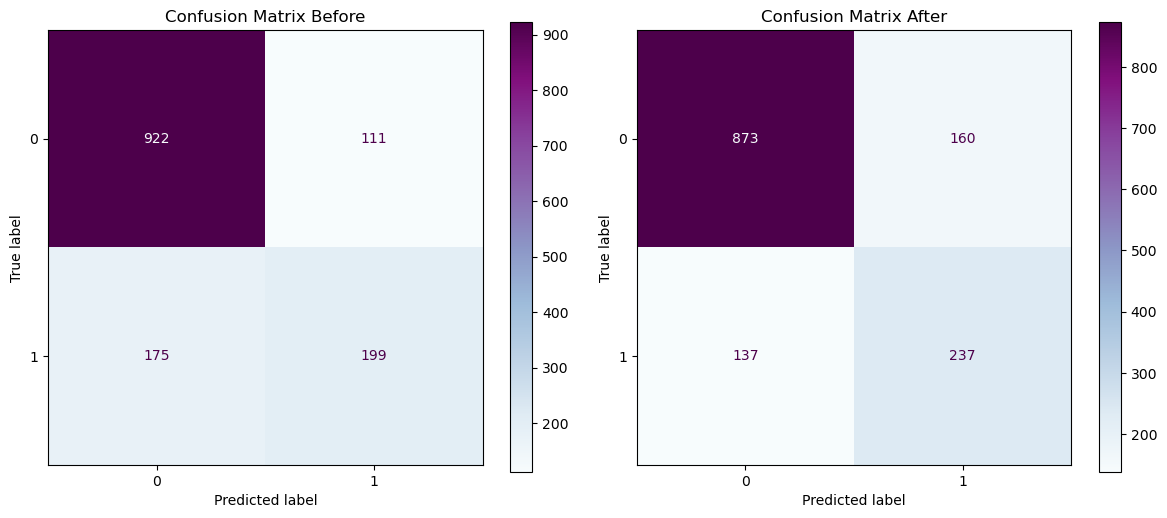

In [66]:
# confusion matrix before
cm_before = confusion_matrix(y_test, y_pred_before)

# confusion matrix after
cm_after = confusion_matrix(y_test, y_pred_after)

fig, axes = plt.subplots(1,2, figsize=(12,5))

disp_before = ConfusionMatrixDisplay(cm_before)
disp_after = ConfusionMatrixDisplay(cm_after)

axes[0].set_title('Confusion Matrix Before')
axes[1].set_title('Confusion Matrix After')
disp_before.plot(ax=axes[0], cmap='BuPu')
disp_after.plot(ax=axes[1], cmap='BuPu')

plt.tight_layout()
plt.show()

In [67]:
print(f'''
After Hyperparameter Tuning, the best model obtained is
       {randomsearch.best_estimator_[-1]},

with an F2 Score of {round(fbeta_score(y_test, y_pred_after, beta=2), 2)}.

Next, we compare the Confusion Matrix before and after Hyperparameter Tuning, with the following results:
--------------------------------------------------------------------------------------------------------------------------------------------
                                                    |                      Before                      |                 After
--------------------------------------------------------------------------------------------------------------------------------------------
Number of Correct Claim Predictions (TP)           :                        922                                             873 
Number of Correct Non-Claim Predictions (TN)       :                        199                                             237
Number of Missed Claims (FN)                        :                       175                                             137
Number of False Alarms (FP)                         :                       111                                             160

Then, we calculate the cost impact to evaluate whether the model can reduce company losses,
with the cost details as follows:
      1. FP (False Positive): Company incurs losses due to mismanaged cycle money, causing
         Cost: $150
      
      2. FN (False Negative): Company suffers losses from claim disputes and loss of customer trust,
         Cost: $240

Cost evaluation is as follows:
      1. Before Tuning
         (FP x $ 87,803,750,000) + (FN x $ 540,803,750,000)
      
         Total Company Loss   : $. {(111 * 150) + (175 * 240)}

      2. After Tuning
         (FP x $ 87,803,750,000) + (FN x $ 540,803,750,000)
      
         Total Company Loss   : $. {(160 * 150) + (137 * 240)}

      Difference (Reduction) : $. {(111 * 150) + (175 * 240)} - $. {(160 * 150) + (137 * 240)}

      Total Savings          : $. {((111 * 150) + (175 * 240)) - ((160 * 150) + (137 * 240))}

      Total Savings (%)      : {round((((111 * 150) + (175 * 240)) - ((160 * 150) + (137 * 240))) / (((111 * 150) + (175 * 240)) + ((160 * 150) + (137 * 240))), 4) * 100} %

Based on the cost evaluation, it can be seen that
the company successfully reduced losses caused by wrong predictions by $. {((111 * 150) + (175 * 240)) - ((160 * 150) + (137 * 240))}.

Thus, the model can be considered SUCCESSFUL in achieving the objectives:
      1. Identifying patterns and risk factors determining claim likelihood,
      2. Helping the company manage claims more effectively,
      3. Creating opportunities to improve operational efficiency,
      4. Maximizing policy profitability, and
      5. Providing more personalized and relevant customer experiences while reducing company losses due to costs.

''')



After Hyperparameter Tuning, the best model obtained is
       LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=9,
                   solver='liblinear'),

with an F2 Score of 0.63.

Next, we compare the Confusion Matrix before and after Hyperparameter Tuning, with the following results:
--------------------------------------------------------------------------------------------------------------------------------------------
                                                    |                      Before                      |                 After
--------------------------------------------------------------------------------------------------------------------------------------------
Number of Correct Claim Predictions (TP)           :                        922                                             873 
Number of Correct Non-Claim Predictions (TN)       :                        199                                             237
Number of Missed Claims (F

### 5.7.3 Highlight

- Cost Evaluation Summary

- Objective
    - Evaluate how well the model reduces business losses from incorrect predictions:
        - **False Positive (FP)**: Loss of \$150
        - **False Negative (FN)**: Loss of \$240

---

- Baseline (Without Model)
    - Predicting all as 0 or all as 1 →  
    - **Total loss: \$154,950**

---

- Model Evaluation

| Condition          | FP  | FN  | Total Cost |
|--------------------|-----|-----|------------|
| Before Tuning      | 111 | 175 | \$58,650    |
| After Tuning       | 160 | 137 | \$56,880    |

---

- Result
    - **Cost Reduction**: \$98,070  
    - **Efficiency Gain**: ~63.3% vs. no model

---

- Conclusion
    - The model significantly reduces company losses and is effective for supporting claim-related decision-making.


## 5.8 Optimized treshold

In [68]:
best_model = randomsearch.best_estimator_

best_model.fit(X_train, y_train)

list_threshold = np.arange(0.01, 1, 0.01)
list_f2 = []

for threshold in list_threshold:

    y_pred_proba = best_model.predict_proba(X_test)[:,1]
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)

    f2 = fbeta_score(y_test, y_pred_class, beta=2)
    list_f2.append(f2)

In [69]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2_score'] = list_f2
df_th = df_th.sort_values('f2_score', ascending=False)
df_th

,threshold,f2_score
21,0.22,0.753758
18,0.19,0.752711
20,0.21,0.751979
19,0.20,0.749891
17,0.18,0.746879
...,...,...
91,0.92,0.000000
90,0.91,0.000000
89,0.90,0.000000
88,0.89,0.000000


<Axes: xlabel='threshold', ylabel='f2_score'>

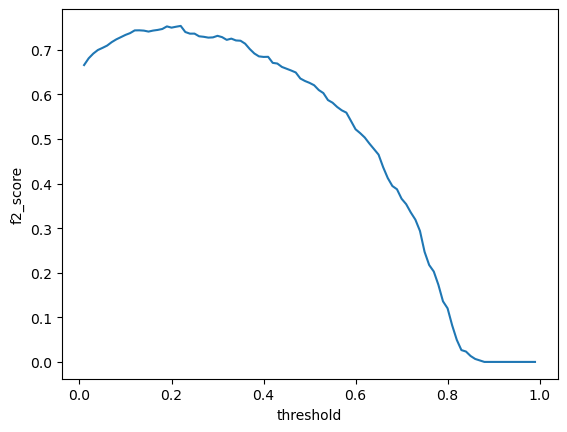

In [70]:
sns.lineplot(x=df_th['threshold'], y=df_th['f2_score'])

In [71]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]
y_pred_optimized = np.where(y_pred_proba > df_th.iloc[0,0], 1, 0)

fbeta_score(y_test, y_pred_optimized, beta=2)

0.7537577365163572

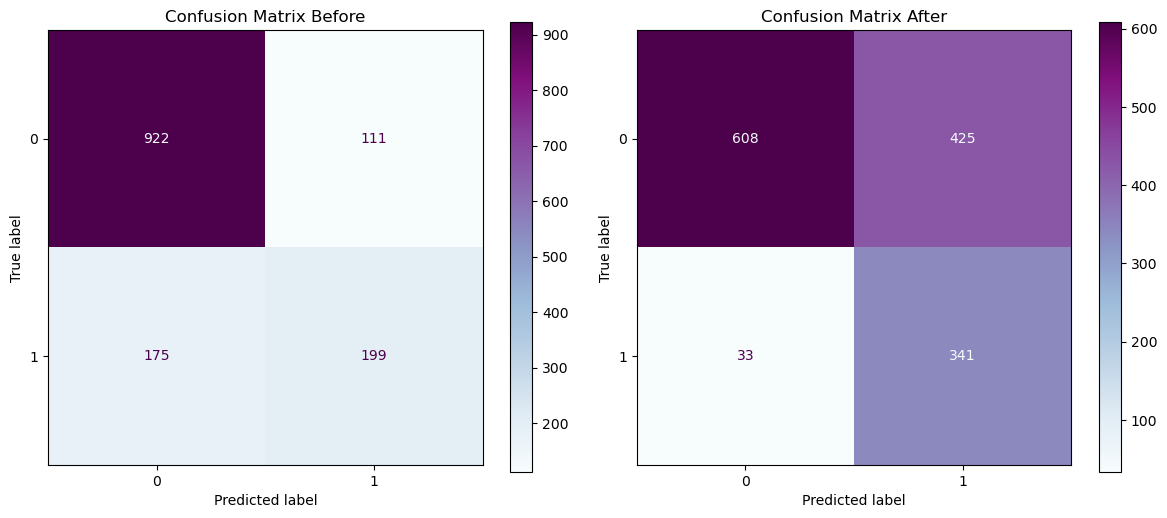

In [72]:
cm2_before = confusion_matrix(y_test, y_pred_before)

cm2_after = confusion_matrix(y_test, y_pred_optimized)

fig, axes = plt.subplots(1,2, figsize=(12,5))

disp_before = ConfusionMatrixDisplay(cm2_before)
disp_after = ConfusionMatrixDisplay(cm2_after)

axes[0].set_title('Confusion Matrix Before')
axes[1].set_title('Confusion Matrix After')
disp_before.plot(ax=axes[0], cmap='BuPu')
disp_after.plot(ax=axes[1], cmap='BuPu')

plt.tight_layout()
plt.show()

In [73]:
print(f'''
with an F2 Score of {round(fbeta_score(y_test, y_pred_optimized, beta=2),2)}.
Next, we compare the Confusion Matrix before and after Hyperparameter Tuning, with the following results:
--------------------------------------------------------------------------------------------------------------------------------------------
                                                    |                      Before                      |                 After
--------------------------------------------------------------------------------------------------------------------------------------------
Number of Correct Claim Predictions (TP)           :                        922                                             608 
Number of Correct Non-Claim Predictions (TN)       :                        199                                             341
Number of Missed Claims (FN)                        :                       175                                              33
Number of False Alarms (FP)                         :                       111                                             425

Then, we calculate the cost impact to evaluate whether the model can reduce company losses,
with the cost details as follows:
      1. FP (False Positive): Company incurs losses due to mismanaged cycle money, causing
         Cost: $150
      
      2. FN (False Negative): Company suffers losses from claim disputes and loss of customer trust,
         Cost: $240

Cost evaluation is as follows:
      1. Before Tuning
         (FP x $ 150) + (FN x $ 240)
      
         Total Company Loss   : $. {(111 * 150) + (175 * 240)}

      2. After Tuning
         (FP x $ 150) + (FN x $ 240)
      
         Total Company Loss   : $. {(425 * 150) + (33 * 240)}

      Difference (Reduction) : $. {(111 * 150) + (175 * 240)} - $. {(425 * 150) + (33 * 240)}

      Total Savings          : $. {((111 * 150) + (175 * 240)) - ((425 * 150) + (33 * 240))}

      Total Savings (%)      : {round((((111 * 150) + (175 * 240)) - ((425 * 150) + (33 * 240))) / (((111 * 150) + (175 * 240)) + ((425 * 150) + (33 * 240))), 4) * 100} %

Based on the cost evaluation, it can be seen that
the company Failed reduced losses caused by wrong predictions by $. {((111 * 150) + (175 * 240)) - ((425 * 150) + (33 * 240))}.

Thus, the model threshold can be considered FAILED in achieving the objectives:
      1. Identifying patterns and risk factors determining claim likelihood,
      2. Helping the company manage claims more effectively,
      3. Creating opportunities to improve operational efficiency,
      4. Maximizing policy profitability, and
      5. Providing more personalized and relevant customer experiences while reducing company losses due to costs.

''')



with an F2 Score of 0.75.
Next, we compare the Confusion Matrix before and after Hyperparameter Tuning, with the following results:
--------------------------------------------------------------------------------------------------------------------------------------------
                                                    |                      Before                      |                 After
--------------------------------------------------------------------------------------------------------------------------------------------
Number of Correct Claim Predictions (TP)           :                        922                                             608 
Number of Correct Non-Claim Predictions (TN)       :                        199                                             341
Number of Missed Claims (FN)                        :                       175                                              33
Number of False Alarms (FP)                         :                    

## 5.9 Feature Importance

In [74]:
best_model = randomsearch.best_estimator_

coefficients = best_model.named_steps['model'].coef_[0]

feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()

koef = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'importance': abs(coefficients)
})

koef = koef.sort_values(by='importance', ascending=False)

print(koef)


                                          feature  coefficient  importance
27                                 Robust__Tenure    -2.890777    2.890777
23                      Onehot__Contract_Two year    -1.249846    1.249846
29                           Robust__TotalCharges     1.172389    1.172389
8             Onehot__InternetService_Fiber optic     1.084099    1.084099
22                      Onehot__Contract_One year    -0.800373    0.800373
28                         Robust__MonthlyCharges    -0.796851    0.796851
4                        Onehot__PhoneService_Yes    -0.571346    0.571346
14   Onehot__DeviceProtection_No internet service    -0.464599    0.464599
19                        Onehot__StreamingTV_Yes     0.434886    0.434886
5                    Onehot__PaperlessBilling_Yes     0.388476    0.388476
11                     Onehot__OnlineSecurity_Yes    -0.328036    0.328036
25         Onehot__PaymentMethod_Electronic check     0.324025    0.324025
21                    One

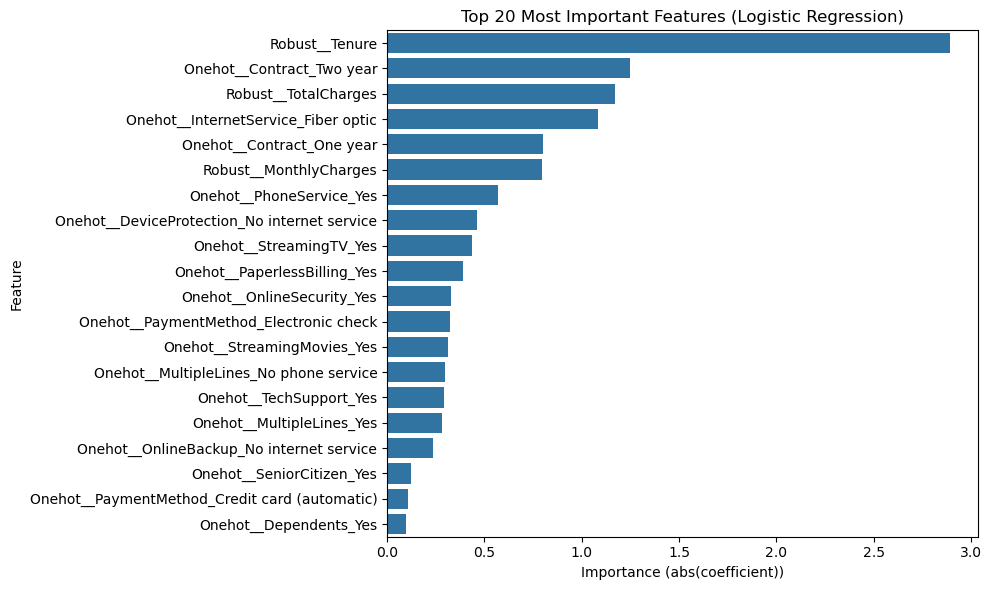

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=koef.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features (Logistic Regression)')
plt.xlabel('Importance (abs(coefficient))')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [76]:
print(f'''
Using Feature Importance, we can identify the key factors influencing a customer's decision 
to churn (leave the service). The most influential features are:

    1. Robust__Tenure  
        This is the most influential factor in predicting customer churn. Tenure refers to how long the customer 
        has been using the service. Customers with longer tenure are typically more loyal, while those with shorter tenure 
        are more likely to churn.

    2. Onehot__Contract_Two year
        The type of contract plays a major role. Customers with a two-year contract are generally more committed and 
        less likely to churn. This highlights the importance of offering long-term contract options to reduce churn.

    3. Robust__TotalCharges
        The total amount a customer has paid over time also significantly influences churn. Customers who have spent more 
        (indicating long-term engagement) are less likely to leave the service.

    4. Onehot__InternetService_Fiber optic
        Customers using fiber optic internet service are at a higher risk of churning compared to those using other types. 
        This may be due to higher expectations for performance, where dissatisfaction could lead to quicker decisions to churn.
''')



Using Feature Importance, we can identify the key factors influencing a customer's decision 
to churn (leave the service). The most influential features are:

    1. Robust__Tenure  
        This is the most influential factor in predicting customer churn. Tenure refers to how long the customer 
        has been using the service. Customers with longer tenure are typically more loyal, while those with shorter tenure 
        are more likely to churn.

    2. Onehot__Contract_Two year
        The type of contract plays a major role. Customers with a two-year contract are generally more committed and 
        less likely to churn. This highlights the importance of offering long-term contract options to reduce churn.

    3. Robust__TotalCharges
        The total amount a customer has paid over time also significantly influences churn. Customers who have spent more 
        (indicating long-term engagement) are less likely to leave the service.

    4. Onehot__InternetService_Fiber optic

## 5.10 Model Explainer

### 5.10.1 Model Explainer based on Koef

In [77]:
print(f'''
One of the main advantages of Logistic Regression is its interpretability.
With this model, we can identify which features drive customers to churn and understand how significant their impact is.
Each feature has a coefficient that indicates whether it increases or decreases the likelihood of churn.

This is very useful for business teams, as we not only know who will churn, but also why they will churn.
With this insight, we can take more appropriate actions, such as offering discounts to customers who are price-sensitive.

Unlike complex models like Random Forest, Logistic Regression is not a black-box.
We can examine the model's internals and explain its behavior transparently to all stakeholders.

---

Logistic Regression models the probability of churn as a sigmoid function of a linear combination of features:

    P(churn) = 1 / (1 + exp(- (β0 + β1*X1 + β2*X2 + ...)))

where βi are the coefficients for features Xi.

Each coefficient βi represents the change in log-odds of churn for a one-unit increase in feature Xi.
- A positive coefficient means the feature increases the likelihood of churn.
- A negative coefficient means the feature decreases the likelihood of churn.

This assumption of linearity in log-odds and interpretability makes Logistic Regression very practical for understanding customer behavior.

---

Here are the top four influential features based on their coefficients:

1. Tenure has the strongest negative coefficient (-2.89), which means customers who have been subscribed longer are far less likely to churn.
   This aligns with business intuition — loyal customers are typically more satisfied.

2. Customers on a Two-year contract show a strong negative effect (-1.25), indicating they are more committed and less likely to leave.
   This highlights the importance of offering long-term contracts to reduce churn.

3. TotalCharges has a positive coefficient (+1.17), suggesting that customers who have paid more over time might actually be more likely to churn.
   Although this may seem counterintuitive, it could indicate early high spenders who later became dissatisfied.

4. Customers with Fiber optic internet service have a positive coefficient (+1.08), meaning they are more likely to churn.
   This might be due to higher expectations for speed and reliability, and if those expectations aren't met, they may switch providers.

---

In summary, Logistic Regression helps us not only predict which customers will churn but also understand why, enabling targeted and transparent business decisions.
''')



One of the main advantages of Logistic Regression is its interpretability.
With this model, we can identify which features drive customers to churn and understand how significant their impact is.
Each feature has a coefficient that indicates whether it increases or decreases the likelihood of churn.

This is very useful for business teams, as we not only know who will churn, but also why they will churn.
With this insight, we can take more appropriate actions, such as offering discounts to customers who are price-sensitive.

Unlike complex models like Random Forest, Logistic Regression is not a black-box.
We can examine the model's internals and explain its behavior transparently to all stakeholders.

---

Logistic Regression models the probability of churn as a sigmoid function of a linear combination of features:

    P(churn) = 1 / (1 + exp(- (β0 + β1*X1 + β2*X2 + ...)))

where βi are the coefficients for features Xi.

Each coefficient βi represents the change in log-odds of churn 

### 5.10.2 Model Explainer SHAP

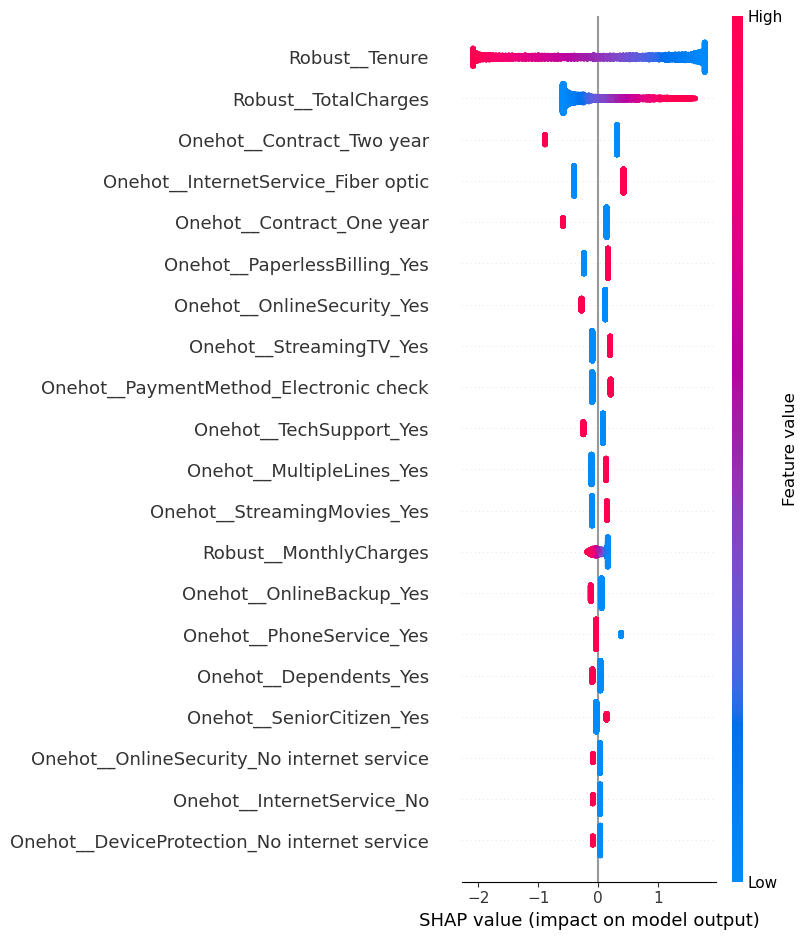

In [78]:
preprocessor = best_model.named_steps['preprocessing']

X_transformed = preprocessor.transform(X)

feature_names = preprocessor.get_feature_names_out()

explainer = shap.LinearExplainer(model, X_transformed, feature_perturbation='interventional')

shap_values = explainer.shap_values(X_transformed)

shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


In [79]:
print(f'''
Using SHAP values, we can identify the key factors influencing a customer's decision 
to churn (leave the service). The most influential features are:

    1. Robust__Tenure  
        This is the most important factor in predicting churn. SHAP shows that shorter tenure (blue dots on the right)
        increases the likelihood of churn, while longer tenure (red dots on the left) decreases it. Customers who have
        been with the company for a long time are less likely to leave.

    2. Robust__TotalCharges
        Total charges correlate with tenure and long-term customer engagement. Customers with low total charges (blue) 
        are more likely to churn, while high total charges (red) reduce the likelihood. This reinforces that loyal, 
        long-term customers are more stable.

    3. Onehot__InternetService_Fiber optic
        Interestingly, customers with fiber optic internet are more likely to churn. This may indicate dissatisfaction
        with service quality or pricing. In the plot, high feature values (magenta) push the prediction toward churn (right side).

    4. Onehot__Contract_Two year
        Customers on a two-year contract are significantly less likely to churn. The SHAP values show that high values 
        (red) shift the prediction to the left, meaning they reduce the chance of churn. Long-term contracts help retain customers.

    5. Robust__MonthlyCharges
        Customers with higher monthly charges (red) are more likely to churn. This suggests price sensitivity. The SHAP
        values confirm that high values push the prediction toward churn.

These insights can help target retention strategies, such as offering incentives for long-term contracts or investigating
service issues for fiber optic users.
''')



Using SHAP values, we can identify the key factors influencing a customer's decision 
to churn (leave the service). The most influential features are:

    1. Robust__Tenure  
        This is the most important factor in predicting churn. SHAP shows that shorter tenure (blue dots on the right)
        increases the likelihood of churn, while longer tenure (red dots on the left) decreases it. Customers who have
        been with the company for a long time are less likely to leave.

    2. Robust__TotalCharges
        Total charges correlate with tenure and long-term customer engagement. Customers with low total charges (blue) 
        are more likely to churn, while high total charges (red) reduce the likelihood. This reinforces that loyal, 
        long-term customers are more stable.

    3. Onehot__InternetService_Fiber optic
        Interestingly, customers with fiber optic internet are more likely to churn. This may indicate dissatisfaction
        with service quality or pricing

# 6. Saving Model

In [80]:
# best_model.fit(X, y)

# with open('Model_Telco_Company.sav', 'wb') as file:
#     pickle.dump(best_model, file)

# 7. Insight & Recommendation Model

1. **Conclusion**
    - The optimized Logistic Regression model achieved an **F2 Score of 0.63**, an improvement from the previous score of **0.57**.  
    - This increase reflects better generalization and an improvement in recall, especially important in reducing **False Negatives**, which are the costliest errors in this business case.
        - **False Negatives reduced** from 175 to 137 (down 38)  
        - **False Positives increased** from 111 to 160 (up 49)  
        - **Total company loss decreased** from **$58,650** to **$56,880**  
        - **Total savings achieved**: **$1,770 (1.53%)**

---

2. **Model Fit Analysis**
    - From the current evaluation:
        - The model used is **Logistic Regression**, which is interpretable and low-complexity by design.
        - The increase in F2 Score from 0.57 to 0.63 suggests **improved generalization** after tuning.
        - The reduction in False Negatives and slight increase in False Positives indicates a **reasonable trade-off**, not overfitting.
        - Since there's no access to train/test split scores, we cannot confirm overfitting — but no evidence suggests it.
        - Given that Logistic Regression is less prone to overfitting and shows better performance on new data

---

3. **Conclusion**:  
    - The model is **well-fitted (not underfitting or overfitting)** and suitable as a **baseline deployment**.

---

4. **Recommendation Model**
    - Model tuning optimize,
        - **Proceed with the current Logistic Regression model** as a cost-effective and interpretable solution.
        - **Evaluate more complex models** like Random Forest or XGBoost to potentially increase F2 Score further.
        - **Perform threshold tuning** to optimize the trade-off between False Positives and False Negatives.
        - **Deploy the model into a production pipeline** with regular evaluation and retraining.
        - **Use feature importance analysis** to understand key risk drivers in claim prediction.
    
    - Model Automaton
        - **Simplfy** the process by using AI agent (ex N8N) for automaton process from start to end data

# 8. Limitation Model

1. **Lack of Specific Subscription Time Information**  
   The dataset does not include any timestamp information such as the exact date or month when customers subscribed. This limits the model's ability to detect seasonal trends or time-based churn patterns.

2. **Missing Historical Behavior Data**  
   The data is a snapshot in time and does not capture customer behavior over a historical period. Without time-series data, the model cannot observe changes in behavior that might signal an impending churn (e.g., recent service downgrades).

3. **TotalCharges Column Initially Contained Missing Values**  
   Although cleaned, the `TotalCharges` feature originally had missing values. If not properly handled during preprocessing, this could reduce the reliability of the model's predictions.

4. **Limited Feature Set**  
   Important features such as customer service interactions, complaints, service usage patterns (daily/monthly), or customer satisfaction feedback are not available, although these could significantly enhance churn prediction.

5. **No Precise Prediction of When a Customer Will Churn**  
   Due to the absence of time and behavior-tracking features, the model cannot predict the exact moment a customer will churn—it only estimates the likelihood of churn occurring in the near future.

## Link Strimlit

TryOut model prediction in strimlit [Click Here](https://finprogammajcds0508strimlit-npqm3st5yq6zpttzyebnfq.streamlit.app/).